In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, os, pickle

In [42]:
dataset_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\datasets\\"
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"

In [43]:
## (7) Party Facts (Insane number of attachable datasets through )
# https://partyfacts.herokuapp.com/data/
# latest linking - 2 days ago - 2020-08-09 07:39:10.333407+00:00

In [44]:
partyfacts_core_parties = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-core-parties.csv")
partyfacts_external_parties = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-external-parties.csv")
partyfacts_countries = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-countries.csv")
partyfacts_datasets = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-datasets.csv")

In [45]:
CHES_comb = pd.read_pickle(dataset_folder+"CHES"+os.sep+"CHES_comb.zip",compression='zip')

In [46]:
## (5) parlgov - updated as of 10/08/2020!

parlgov_party = pd.read_excel(dataset_folder+"PARLGOV"+os.sep+ "parlgov.xlsx",sheet_name="party")
parlgov_election = pd.read_excel(dataset_folder+"PARLGOV"+os.sep+ "parlgov.xlsx",sheet_name="election")
parlgov_cabinet = pd.read_excel(dataset_folder+"PARLGOV"+os.sep+ "parlgov.xlsx",sheet_name="cabinet")
parlgov_variable = pd.read_excel(dataset_folder+"PARLGOV"+os.sep+ "parlgov.xlsx",sheet_name="variable")
# party, election, cabinet, variable

In [47]:
## (1) Comparative Manifesto Project CMP
# https://manifesto-project.wzb.eu/
Manifesto_Project_Dataset_version_2020a = "MPDataset_MPDS2020a_stata14.dta"

latest_CMP_file = dataset_folder+"CMP"+os.sep+Manifesto_Project_Dataset_version_2020a

manifesto_project = pd.read_pickle(latest_CMP_file.replace("dta","zip"),compression='zip')
with open(latest_CMP_file.replace("dta","_labels.zip"), 'rb') as fname:
    CMP_labels = pickle.load(fname)
with open(latest_CMP_file.replace("dta","_header.zip"), 'rb') as fname:
    CMP_header = pickle.load(fname)

In [49]:
# partyfacts_external_parties["dataset_key"].value_counts()

In [50]:


# 
pf_ches_ids = partyfacts_external_parties.loc[partyfacts_external_parties["dataset_key"]=="ches","dataset_party_id"]
pf_cmp_ids  = partyfacts_external_parties.loc[partyfacts_external_parties["dataset_key"]=="manifesto","dataset_party_id"]
pf_parlgov_ids  = partyfacts_external_parties.loc[partyfacts_external_parties["dataset_key"]=="parlgov","dataset_party_id"]
# pf_ray_ids  = partyfacts_external_parties.loc[partyfacts_external_parties["dataset_key"]=="ray","dataset_party_id"]
# already absorbed through CHES

pf_ees14_ids = partyfacts_external_parties.loc[partyfacts_external_parties["dataset_key"]=="ees14","dataset_party_id"]

# I think these are just cmp ids!
pf_pip_ids = partyfacts_external_parties.loc[partyfacts_external_parties["dataset_key"]=="pip","dataset_party_id"]

In [51]:
# (pf_ches_ids=="2618").sum()

In [52]:
## comparative manifesto project

In [53]:
# missing_cmp_party_ids = manifesto_project[ manifesto_project["party"].apply(lambda x: str(x) not in pf_cmp_ids.values) ]["party"].drop_duplicates().sort_values()
# list(manifesto_project[ manifesto_project["party"].apply(lambda x: str(x) not in pf_cmp_ids.values) ]["country"].drop_duplicates().values)

In [54]:
# cntry = "norway"

# manifesto_project[manifesto_project["party"]\
#     .apply(lambda x: int(x) in missing_cmp_party_ids.values) & (manifesto_project["country"]==cntry)]\
#     .sort_values(by=["country","party"])\


In [55]:
# cntry = "nor"
# partyfacts_core_parties[(partyfacts_core_parties["country"]==cntry.upper())]\
#     .sort_values(by='year_last',ascending=False)[:50]


# # {
# #  98617:3266,98630:5825,98720:3267, # ukr
# #  97020:2276,97230:6131,97341:6132,97460:3114,97460:3114,97461:3098, # svn
# #  92022:4871,92450:4630,92720:4631, # pol
# #  89911:[431,???], 89912:???,89916:5585, # mkd
# #  87042:8393, 87640:6355, 87730:6356, # lva
# #  79030:[4717,???], 79090:[big confusing uber-coalition], 79440:????, # bih
# #  74640:6236, 74717:572, # tur
# #  51430:1477, # gbr
# #  43020:[???], # che
# #  33710:3218, 33912:7421, 33913:???, 33914:5623, # esp
# #  32022:7671, 32031:???, 32051:???, 32055:6158, 32090:7790, # ita
# #  21230: 1753, # bel
# #  15450: 5454, 15630: 7565, 15953:5852, # isl
# #  14440: ???, # fin
# #  13110: 4070, # dnk
# #  12230: 3698, # nor


# # }

In [56]:
# missing_ches_party_ids = CHES_comb[ CHES_comb["party_id"].apply(lambda x: str(x) not in pf_ches_ids.values) ]["party_id"].drop_duplicates().sort_values()
# CHES_comb[ CHES_comb["party_id"].apply(lambda x: str(x) not in pf_ches_ids.values) ][["country","party_id"]].drop_duplicates().sort_values(by="party_id")
# 48

# missing parties - 84-96 western europe, non-eu 2007/2010

# {:351}

In [63]:
# manifesto_project["party"].apply(lambda x: str(x) in pf_cmp_ids.values).mean()

In [64]:


# 476 index is the one where you should overwrite the party_id -> partyfacts_id!
# 801 is mostly 934 (DC), but the 96 reference is 762+1767
# I reckon the best thing might be tag 84/88/92 as DC (934) and leave 96 out since it's just not clear
# New Left Current 407 ->>??? # the ches/ray data here is awful, the party is tiny (near 0% voteshare) so probably not worth going mad over

In [65]:
# ADDING PARTYFACTS_ID TO CHES DATASET


ches_id_to_pfid = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="ches"][["dataset_party_id","partyfacts_id"]].astype(int).set_index("dataset_party_id")["partyfacts_id"]

ches_id_to_pf_fixes = pd.Series({3404:351, 3405:159, 3406:2503, # tur
 3301:2175,3304:2346,3305:6625,3306:2193,3309:2176, # srb
 1203:1480,1204:1600,1207:181 ,1212:1688,1213:886 , # prt
 1010:1581,1011:1050,1012:459 ,1013:1714, # nld
 3203:171 ,3206:4258,3207:2447, # mkd
 801:934,804:742,810:1461,812:131,816:1429, # ita
 704:208,           # irl
 3111:2502, # hrv
 405:648  ,406:1276 ,407:np.nan, # grc
 1103:762, # gbr
 604:912, 611:1273, # fra
 1407:166, 1410:249, # fin
 503:1248, 509:1326, 515:2457 , # esp
 205:1134, 207:112, 208:277, 209:1676, 214:1136, # dnk
 307:1135 , # deu
 3609:669 , # che
 3002:357 , # bih
 101:302 , # bel
 1305:996 , # aut
})


ches_id_to_pfid = ches_id_to_pfid.append(ches_id_to_pf_fixes)

CHES_comb["partyfacts_id"] = CHES_comb["party_id"].apply(lambda x: ches_id_to_pfid.loc[x])

# manual fix for that one weird entry
CHES_comb.loc[476,"partyfacts_id"]=np.nan

## we should save the version with the partyfacts_id

CHES_comb.to_pickle(dataset_folder+"CHES"+os.sep+"CHES_comb_linked.zip",compression='zip')

In [66]:
# ADDING PARTYFACTS_ID TO CMP DATASET

cmp_id_to_pfid = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="manifesto"]\
    [["dataset_party_id","partyfacts_id"]].astype(int).set_index("dataset_party_id")["partyfacts_id"]

cmp_id_to_pf_fixes = pd.Series({ 98630:5825, 98617:3266, 98720:3267, # ukr
  97020:2276, 97460:3114, 97461:3098, 97230:6131, 97341:6132, #svn
  92022:4871, 92450:4630, 92720:4631, # pol
  89911:np.nan, 89912:np.nan , 89916:5585 ,  # mkd
#  (splinter groups/alliance that just don't exist in partyfacts)
  87042:8393, 87640:6355, 87730:6356, # lva
  79030:4717, 79090:1166, 79440:np.nan, # bih
  74640:6236, 74717:572 , # tur
  51430:1477, # gbr
  43020:np.nan, # che
  33710:3218, 33912:7421, 33913:np.nan, 33914:5623, # esp
# PRC (regionalist party) doesn't appear in partyfacts (regional only until 2019)
  32022:7671, 32031:8246, 32051:7670, 32055:6158, 32090:7790, 32451:6155, # ita
  21230:1753, # bel
  15450:5454,15630:7565, 15953:5852, # isl
  14440:np.nan, # fin - not present, but quite new (2018)
#  https://en.wikipedia.org/wiki/Movement_Now
  13110:4070, # dnk
  12230:3698, # nor

})


cmp_id_to_pfid = cmp_id_to_pfid.append(cmp_id_to_pf_fixes)

manifesto_project["partyfacts_id"] = manifesto_project["party"].apply(lambda x: cmp_id_to_pfid.loc[x])

# manual fix for that one weird entry
manifesto_project.to_pickle(dataset_folder+"CMP"+os.sep+ "manifesto_project_linked.zip",compression='zip')

In [68]:
# latest_CMP_file

In [69]:
cmp_to_pf = manifesto_project.set_index("party")["partyfacts_id"].drop_duplicates().dropna()
cmp_to_pf = cmp_to_pf.astype(int)
ches_to_pf = CHES_comb.set_index("party_id")["partyfacts_id"].drop_duplicates().dropna()

In [70]:
## did we get 'all' the cmp_id -> partyfacts_id references?

# because there's more cmp datasets than the raw manifesto project



In [71]:
# partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="manifesto"].shape,cmp_to_pf.shape

In [72]:
# temp = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="manifesto"]
# temp[temp["partyfacts_id"].apply(lambda x: x not in cmp_to_pf.values)]["country"].value_counts()

# ARG, BRA, CHL, BOL, URY -> parts of latin america



In [73]:
# pg_cols_ids = ['partyfacts_id',
#  'partyfacts_id_cmp',
#  'partyfacts_id_ches',
#  'partyfacts_id_ees']

# party_cols = ["party_id","country_name_short","party_name_short","party_name_english","party_name","party_name_ascii"]

# # parlgov_party[]

# discrepant_ids = parlgov_party[ pg_cols_ids ].apply(lambda x: len(x.dropna().unique())>1, axis=1 ) 
# parlgov_party.loc[discrepant_ids,pg_cols_ids+party_cols][:50]

In [74]:
# pf_to_eng_name = partyfacts_core_parties.set_index("partyfacts_id")["name_english"]
# parlgov_party["pf_eng_name"] = parlgov_party["partyfacts_id"].apply(lambda x: pf_to_eng_name.loc[x] if pd.notnull(x) else np.nan)
# parlgov_party.loc[discrepant_ids,["party_name_english","pf_eng_name","party_id"]][:50]

In [75]:
# 516	Ecological Party	Estonian Citizens	1105
# 585	Conservatives	Republican Party of Liberty	1297
# 973	Centre Right	Pole of Freedoms	67
# 974	Centre Left	The Olive Tree	1048


# parlgov_party.loc[[516,585,973,974],pg_cols_ids+["pf_eng_name"]+party_cols][:50]

In [76]:
# # partyfacts_id, cmp, ches, ees, party_id
# partyfacts_parties = partyfacts_core_parties.set_index("partyfacts_id").sort_index()
# partyfacts_parties.loc[1737.0]

In [1]:
# {
#     723: , # really does point at two distinct parties (CVP & CD&V), although one turns into the other
#     915: , # cmp is wrong here (PRL instead of RM), everything else is fine
#     501: , # cmp is wrong here (VU instead N-VA), everything else is fine
#     454: , # ches is wrong here (MR instead of PRL), everything else is fine
#     1192: , # really does point at two distinct parties (PSC & CdH), although one turns into the other
#     1113: , # partyfacts_id correct, ches and cmp wrong
#     290:  , # ches wrong, everything else right
#     1375: , # cmp wrong, everything else right
#     982: , # ees wrong, everything else right
 
#     ## this is a bit much for all 70+ entries (there's no repetition so far)
# }

In [77]:
pip_ideol = pd.read_pickle( dataset_folder + "PIP" + os.sep + "ideological_indices.zip", compression='zip' )

pip_id_to_pfid = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="pip"]\
    [["dataset_party_id","partyfacts_id"]].astype(int).set_index("dataset_party_id")["partyfacts_id"]

# parlgov_id_to_pfid = parlgov_id_to_pfid.append(parlgov_id_to_pf_fixes)

pip_ideol["partyfacts_id"] = pip_ideol["Party code according to CMP"].apply(lambda x: pip_id_to_pfid.loc[x] if x in pip_id_to_pfid.index else np.nan)
# blanks added for what appears to be a large set of independent/non-affiliated pseudo-parties

pip_ideol["partyfacts_id_cmp"] = pip_ideol["Party code according to CMP"].apply(lambda x: cmp_to_pf.loc[x] if (x in cmp_to_pf.index) else np.nan)

pip_ideol.loc[(pip_ideol["partyfacts_id_cmp"]==1424.0) & (pip_ideol["Year"]<=2001),\
                  "partyfacts_id"] = 1424
pip_ideol.loc[(pip_ideol["partyfacts_id_cmp"]==1424.0) & (pip_ideol["Year"]>2001),\
                  "partyfacts_id_cmp"] = 36

pip_ideol.loc[(pip_ideol["partyfacts_id_cmp"]==719.0) & (pip_ideol["Year"]<=1975),\
                  "partyfacts_id_cmp"] = 1203
pip_ideol.loc[(pip_ideol["partyfacts_id_cmp"]==719.0) & (pip_ideol["Year"]>1975),\
                  "partyfacts_id"] = 719

pip_ideol.loc[(pip_ideol["partyfacts_id_cmp"]==8268.0) & (pip_ideol["Year"]<2005),\
                  "partyfacts_id"] = 8268

pip_ideol.to_pickle( dataset_folder+"PIP"+os.sep+"ideological_indices_linked.zip" , compression = 'zip' )

In [78]:
# pip_ideol["partyfacts_id_cmp"].isnull().sum()

# 79!

In [1390]:
# pip_id_discrepants = ((pip_ideol["partyfacts_id_cmp"]!=pip_ideol["partyfacts_id"])& ~pip_ideol["partyfacts_id_cmp"].isnull())

In [79]:
# pip_cols = ['partyfacts_id', 'partyfacts_id_cmp','Country name', 'Year', 'Party code according to CMP',
#        'Name of the government party', 'Dummy: 1 = Government party',
#        'CMP party code', 'Name of party (english)',
#        'party family membership', 'party abbreviation']
# pip_ideol[pip_ideol["partyfacts_id_cmp"].isnull()][pip_cols]#["CMP party code"].value_counts().head(20)

# # Could use these to check which cmp ids aren't linked?

In [ ]:
# pip_ideol[pip_id_discrepants][pip_cols]

In [80]:
# partyfacts_parties = partyfacts_core_parties.set_index("partyfacts_id").sort_index()
# partyfacts_parties.loc[8268.0]

In [81]:
# partyfacts_parties = partyfacts_core_parties.set_index("partyfacts_id").sort_index()
# partyfacts_parties.loc[1566]

In [82]:
euromanifesto = pd.read_pickle( dataset_folder+"Euromanifesto"+os.sep+"Euromanifesto" , compression = 'zip' )


def get_ees_int_id(x):
    if pd.isnull(x):
        return np.nan
    elif isinstance(x,float):
        return int(x)
    else:
        return int(x.split(" ")[0])
    
def get_ees_party(x):
    if pd.isnull(x):
        return np.nan
    elif isinstance(x,float):
        return np.nan
    else:
        return x.split(" ")[1]

In [83]:
euromanifesto["ees_id"] = euromanifesto["ees"].replace({"No EES code available":np.nan}).apply(lambda x: get_ees_int_id(x))
euromanifesto["ees_party"] = euromanifesto["ees"].replace({"No EES code available":np.nan}).apply(lambda x: get_ees_party(x))
euromanifesto["emcs_id"] = euromanifesto["emcs"].replace({"No EES code available":np.nan}).apply(lambda x: x.split(" ")[0] if pd.notnull(x) else np.nan)
euromanifesto["emcs_party"] = euromanifesto["emcs"].replace({"No EES code available":np.nan}).apply(lambda x: " ".join(x.split(" ")[1:]) if pd.notnull(x) else np.nan)

euromanifesto["ees_id"].apply(lambda x: x not in pf_ees14_ids.values).sum(),euromanifesto["ees_id"].isnull().sum()

(977, 192)

In [84]:
euromanifesto_id_to_pf_fixes =\
    pd.Series({ 1705100:3205, # svn
    1642400:5246, 1642401:481, 1642301:6153, 1642503:3210, # rou
    1440021:237 , 1440824:1490, "88910 LRA-RA":556, # ltu
    "87411 V":852,"87710 VL-TB/LNNK":7619,1428901:5657, # lva
    1348220:1408, 1348330:469, "86524 Fidesz-KDNP":6366 , # hun
    1191110:3201, # hrv
    1100601:3189, # bgr
    1372220:1448, # irl
    1826621:1366, # gbr
    "41112 ÖDP":7345, 1276522:1731, "41710 NPD":1723, "41910 FW":1090, "41953 Die Partei":6126,"41954 Tierschutz":749, # deu
    1620110:3226, # prt
    1300314:np.nan, 1300323:3118, 1300116:378, # grc
    1724230:3203, "33410 C's":3217,
    "32210 L'Altra Europa":6685, 1380958:1369, # ita
    "31115 EELV":5650, # fra
    1528528:6758, # nld
    1056112:528, "21520 CSP":6688, # bel
    1208954: 333, # dnk
    1752321:487, 1752952:1093 ,
              
    "13901 Siumut": 6651, # dnk
    "22310 PPR": 1581, "22311 CPN": 459, "22951 ET":523, # nld
    "31222 LCR":1506, # fra
    1380007:7031, # ita
    1724320:1338,1724101:2455,1724321:1248, "33935 plEdlP":5853,"33913 ARM":841, # esp
    "36110 KOP":858, # cyp
    1826724:762,1826903:335,"51952 Respect":1082, # gbr
    "83611 ResP":491, # est
    1428317:5976, 1428611:415, 1428424:461, # lva
    "88523 KKSS":52, # ltu [168,556]
    1616210:6183, # pol
    1703955:258, # svk    

    # upshot of checking for discrepancies between CHES/CMP/EES ids
    "31635 RPR-UDF":np.nan,
    "31950 MoDem-UDI":np.nan,
    "31625 RPR":509,
    "32523 UDC":1758,
    "83710 IL":779,
    "83720 IRL":685,
    "32521 CCD":1767,  
               
    "32630 FI":8058, # 2nd Forza Italia (2013)
    "32610 FI":1626,               
              
    "31323 MDC":3156,               
              })

# nan_strings={"Unknown":np.nan,"Unavailable":np.nan}

euromanifesto["partyfacts_id_ees_id"] = euromanifesto["ees_id"].apply(lambda x: euromanifesto_id_to_pf_fixes.loc[int(x)] if (x in euromanifesto_id_to_pf_fixes.index) else np.nan)
euromanifesto["partyfacts_id_emcs"] = euromanifesto["emcs"].apply(lambda x: euromanifesto_id_to_pf_fixes.loc[x] if (x in euromanifesto_id_to_pf_fixes.index) else np.nan)

euromanifesto["partyfacts_id_cmp"] = euromanifesto["marpor"].apply(lambda x: cmp_to_pf.loc[x] if (x in cmp_to_pf.index) else np.nan)
euromanifesto["partyfacts_id_ches"] = euromanifesto["cphl"].apply(lambda x: ches_to_pf.loc[x] if (x in ches_to_pf.index) else np.nan)

em_cols_ids = ["partyfacts_id_ees_id","partyfacts_id_emcs","partyfacts_id_cmp","partyfacts_id_ches"]
discrepant_ids = euromanifesto[ em_cols_ids ].apply(lambda x: len(x.dropna().unique())>1, axis=1 )
# euromanifesto[ em_cols_ids ].diff(axis=1).applymap(lambda x: (x>0) or (x<0)).any(axis=1)

dodgy_cmp_links =\
{1586:7015,  # SPA/SPIRIT->SPIRIT (there was a SPA/SPIRIT alliance in 2007 but not 2004)
 554: 789,   # PRL -> MR ... merged into it in 2002 (erroneous link is in 2004)
 622: 604,   # CVP -> CD&V ... but literally identical party, just changed name in 2001, references either side ...! *
 633: 2338,  # PSC -> CDH ... same situation, just changed in 2002 *
 1424:36,    # VU  -> N-VA ... SPIRIt and N-VA were the left/right wings of VU before they broke off to form diff parties in 2001
 1968:553,   # Vlams Blok(553) -> Vlams Belang(553&1968) in 2004 (they got sued, and just reformed with a different name)
 1108:5650,  # Les Verts -> Europe Ãcologie - Les Verts in 2010 *
 509: 1595,  # RPR -> UMP in 2002
 516: 301,   # SYN -> SYRIZA 2013
 321: 1028,  # ED -> EDEK just a bug!
 1691:6366,  # Since 2005, Fidesz + KDNP are a more or less obligate perma-coalition
 6804:1063,  # LKDP -> LKD in 2001
 874: 481,   # PDL -> PNL just a bug!
}

dodgy_ches_links =\
{
 1108:5650,  # Les Verts -> Europe Ãcologie - Les Verts in 2010
 14:1783,    # PR -> PRG
 496:213,    # (novelle)UDF -> MoDem in 2007
 1701:934,   # DC(934) -> PPI(1701) in 1994
 1375:211,   # at least, in the context of manifestos, CDU really is CDU/CSU (they don't appear to release separate ones)
 1691:6366,  # Since 2005, Fidesz + KDNP are a more or less obligate perma-coalition    
 1357:1193,  # LLS -> LiCS merged into in 2003
 1566:8268,  # UW -> PD in 2005
 1715:660,   # PD -> PDL in 2007
    
}

dodgy_emcs_links =\
{
 5246:660,   # PD -> PDL in 2007
}

euromanifesto.loc[discrepant_ids,"partyfacts_id_cmp"] = euromanifesto.loc[discrepant_ids,"partyfacts_id_cmp"].replace(dodgy_cmp_links)
euromanifesto.loc[discrepant_ids,"partyfacts_id_ches"] = euromanifesto.loc[discrepant_ids,"partyfacts_id_ches"].replace(dodgy_ches_links)
euromanifesto.loc[discrepant_ids,"partyfacts_id_emcs"] = euromanifesto.loc[discrepant_ids,"partyfacts_id_emcs"].replace(dodgy_emcs_links)

euromanifesto.loc[(euromanifesto["emcs"]=="41221 Die Linke") & (euromanifesto["year"].astype(int)<=2007),\
                  "partyfacts_id_emcs"] = 86

euromanifesto.loc[(euromanifesto["emcs"]=="41221 Die Linke") & (euromanifesto["year"].astype(int)>2007),\
                  "partyfacts_id_emcs"] = 1545

# now, for discrepant_ids, we have the correct values in the partyfacts_id_emcs column to copy across to 
# partyfacts_id_cmp, partyfacts_id_ches
    # apply in order, run manual string fix last!
discrepant_ids = euromanifesto[ em_cols_ids ].apply(lambda x: len(x.dropna().unique())>1, axis=1 )    
euromanifesto.loc[discrepant_ids,"partyfacts_id_cmp"] = euromanifesto.loc[discrepant_ids,"partyfacts_id_emcs"]
euromanifesto.loc[discrepant_ids,"partyfacts_id_ches"] = euromanifesto.loc[discrepant_ids,"partyfacts_id_emcs"]

euromanifesto[ "partyfacts_id" ] = euromanifesto[ em_cols_ids ].fillna(axis=1,method='ffill')["partyfacts_id_ches"]

euromanifesto.to_pickle( dataset_folder+"Euromanifesto"+os.sep+"Euromanifesto_linked.zip" , compression = 'zip' )

In [85]:
# ADDING PARTYFACTS_ID TO PARLGOV DATASET

# this needs to go after Euromanifesto!

ees_to_pf = euromanifesto[["ees_id","partyfacts_id"]].drop_duplicates().dropna().set_index("ees_id")["partyfacts_id"]

ees_to_pf = ees_to_pf.drop([1276321,1440420])

# drop these two non-unique indices!

parlgov_id_to_pfid = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="parlgov"]\
    [["dataset_party_id","partyfacts_id"]].astype(int).set_index("dataset_party_id")["partyfacts_id"]

parlgov_id_to_pf_fixes = pd.Series({656:791, 1487:7015, # bel
 542:6749, 1548:7807, 963:659, 529:7809, # bgr
 1367:1564, 1224:206, 424:366, # esp
 1257:np.nan, # est
 1105:1223 , 806:7030, # fin # error here, fixed
 2252:np.nan , # fra
 1547:957 , # gbr
 2163:np.nan, # grc
 379:1029, 30:np.nan, # irl 
 896:614, 760:1165, # ita
 1074:np.nan, 1208:1430, # pol
 622:35, 889:387, 1535:886, 565:1301, # prt
 152:477, # rou
 2247:2283 , # svk
 721:1485, # swe
                                    
})


parlgov_id_to_pfid = parlgov_id_to_pfid.append(parlgov_id_to_pf_fixes)

parlgov_party["partyfacts_id"] = parlgov_party["party_id"].apply(lambda x: parlgov_id_to_pfid.loc[x] if x in parlgov_id_to_pfid.index else np.nan)
# blanks added for what appears to be a large set of independent/non-affiliated pseudo-parties


parlgov_party["partyfacts_id_cmp"]  = parlgov_party["cmp"].apply(lambda x: cmp_to_pf.loc[x]  if (x in cmp_to_pf.index)  else np.nan)
parlgov_party["partyfacts_id_ches"] = parlgov_party["chess"].apply(lambda x: ches_to_pf.loc[x] if (x in ches_to_pf.index) else np.nan)
parlgov_party["partyfacts_id_ees"] = parlgov_party["ees"].apply(lambda x: ees_to_pf.loc[x] if (x in ees_to_pf.index) else np.nan)

parlgov_party.to_pickle(dataset_folder+"PARLGOV"+os.sep+ "parlgov_party_linked.zip",compression='zip')

parlgov_election["partyfacts_id"] = parlgov_election["party_id"].apply(lambda x: parlgov_id_to_pfid.loc[x] if x in parlgov_id_to_pfid.index else np.nan)
parlgov_cabinet["partyfacts_id"]  = parlgov_cabinet["party_id"].apply( lambda x: parlgov_id_to_pfid.loc[x] if x in parlgov_id_to_pfid.index else np.nan)

parlgov_election.to_pickle(dataset_folder+"PARLGOV"+os.sep+ "parlgov_election_linked.zip",compression='zip')
parlgov_cabinet.to_pickle( dataset_folder+"PARLGOV"+os.sep+ "parlgov_cabinet_linked.zip" ,compression='zip')

In [1326]:
# discrepant_ids = 

# euromanifesto[ em_cols_ids ].apply(lambda x: len(x.dropna().unique())>1, axis=1 )
#.diff(axis=1).applymap(lambda x: (x>0) or (x<0)).any(axis=1)

In [1342]:
# euromanifesto[["partyfacts_id_ees_id","partyfacts_id_emcs","partyfacts_id_cmp","partyfacts_id_ches"]].notnull().sum(axis=1).value_counts()

In [1344]:
# euromanifesto[["partyfacts_id_ees_id","partyfacts_id_emcs","partyfacts_id_cmp","partyfacts_id_ches"]].isnull().sum()

In [1345]:
# em_cols_ids = ["partyfacts_id_ees_id","partyfacts_id_emcs","partyfacts_id_cmp","partyfacts_id_ches"]
# em_cols = em_cols_ids + ['country', 'initials', 'year', 'ees_id', 'region', 'emcs',  'ees', 'marpor', 'cphl', 'eep', 'member', 'year',
#        'initials', 'partyname', 'partyinfo', 'ees_party', 'emcs_id',   'emcs_party']
# euromanifesto[ euromanifesto[ em_cols_ids ].notnull().sum(axis=1)>=3 ][em_cols]

In [1330]:
# euromanifesto[euromanifesto["partyfacts_id_cmp"]==516][em_cols]


In [1346]:
# FIXES WHERE IDS CONTRADICT

# discrepant_ids = euromanifesto[ em_cols_ids ].diff(axis=1).applymap(lambda x: (x>0) or (x<0)).any(axis=1)

# dodgy_cmp_links =\
# {1586:7015,  # SPA/SPIRIT->SPIRIT (there was a SPA/SPIRIT alliance in 2007 but not 2004)
#  554: 789,   # PRL -> MR ... merged into it in 2002 (erroneous link is in 2004)
#  622: 604,   # CVP -> CD&V ... but literally identical party, just changed name in 2001, references either side ...! *
#  633: 2338,  # PSC -> CDH ... same situation, just changed in 2002 *
#  1424:36,    # VU  -> N-VA ... SPIRIt and N-VA were the left/right wings of VU before they broke off to form diff parties in 2001
#  1968:553,   # Vlams Blok(553) -> Vlams Belang(553&1968) in 2004 (they got sued, and just reformed with a different name)
#  1108:5650,  # Les Verts -> Europe Ãcologie - Les Verts in 2010 *
#  509: 1595,  # RPR -> UMP in 2002
#  516: 301,   # SYN -> SYRIZA 2013
#  321: 1028,  # ED -> EDEK just a bug!
#  1691:6366,  # Since 2005, Fidesz + KDNP are a more or less obligate perma-coalition
#  6804:1063,  # LKDP -> LKD in 2001
#  874: 481,   # PDL -> PNL just a bug!
# }

# dodgy_ches_links =\
# {
#  1108:5650,  # Les Verts -> Europe Ãcologie - Les Verts in 2010
#  14:1783,    # PR -> PRG
#  496:213,    # (novelle)UDF -> MoDem in 2007
#  1701:934,   # DC(934) -> PPI(1701) in 1994
#  1375:211,   # at least, in the context of manifestos, CDU really is CDU/CSU (they don't appear to release separate ones)
#  1691:6366,  # Since 2005, Fidesz + KDNP are a more or less obligate perma-coalition    
#  1357:1193,  # LLS -> LiCS merged into in 2003
#  1566:8268,  # UW -> PD in 2005
#  1715:660,   # PD -> PDL in 2007
# }

# dodgy_emcs_links =\
# {
#  5246:660,   # PD -> PDL in 2007
# }

     # FI(1626)ches -> iPdL(365)cmp in 2009, one row in 2004, one in 2014, emcs "32610 FI" FIXED - different emcs
     # PDS(86)cmp -> Die Linke(1545)cmp in 2007, one row in 1999, one in 2014, emcs "41221 Die Linke"



In [1347]:
discrepant_ids = euromanifesto[ em_cols_ids ].apply(lambda x: len(x.dropna().unique())>1, axis=1 )  

euromanifesto[discrepant_ids][em_cols].sort_values(by="emcs")
# ees_id, id_emcs, cmp, ches

,partyfacts_id_ees_id,partyfacts_id_emcs,partyfacts_id_cmp,partyfacts_id_ches,country,initials,year,ees_id,region,emcs,...,cphl,eep,member,year,initials,partyname,partyinfo,ees_party,emcs_id,emcs_party


In [1348]:
no_ids = euromanifesto[ em_cols_ids ].apply(lambda x: len(x.dropna().unique())==0, axis=1 )  
euromanifesto[no_ids][em_cols].sort_values(by="emcs")

## all unlinkable/coalitions

,partyfacts_id_ees_id,partyfacts_id_emcs,partyfacts_id_cmp,partyfacts_id_ches,country,initials,year,ees_id,region,emcs,...,cphl,eep,member,year,initials,partyname,partyinfo,ees_party,emcs_id,emcs_party
587,NaN,NaN,NaN,NaN,Europe,GREEN-EFA,2009.0,NaN,Europe,10100 GREEN-EFA,...,Unavailable,Inapplicable,Inapplicable,2009.0,GREEN-EFA,Group of the Greens - European Free Alliance,,NaN,10100,GREEN-EFA
384,NaN,NaN,NaN,NaN,Europe,GREEN-EFA,2004.0,NaN,Europe,10100 GREEN-EFA,...,Unavailable,Inapplicable,Inapplicable,2004.0,GREEN-EFA,Group of the Greens - European Free Alliance,,NaN,10100,GREEN-EFA
159,NaN,NaN,NaN,NaN,Europe,GREEN-EFA,1994.0,NaN,Europe,10100 GREEN-EFA,...,Unavailable,Inapplicable,Inapplicable,1994.0,GREEN-EFA,Group of the Greens - European Free Alliance,,NaN,10100,GREEN-EFA
92,NaN,NaN,NaN,NaN,Europe,GREEN-EFA,1989.0,NaN,Europe,10100 GREEN-EFA,...,Unavailable,Inapplicable,Inapplicable,1989.0,GREEN-EFA,Group of the Greens - European Free Alliance,,NaN,10100,GREEN-EFA
266,NaN,NaN,NaN,NaN,Europe,GREEN-EFA,1999.0,NaN,Europe,10100 GREEN-EFA,...,Unavailable,Inapplicable,Inapplicable,1999.0,GREEN-EFA,Group of the Greens - European Free Alliance,,NaN,10100,GREEN-EFA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,NaN,NaN,NaN,NaN,Hungary,EgyÃ¼tt-PM,2014.0,1348120.0,Hungary,86110 EgyÃ¼tt-PM,...,Unknown,2004,2004,2014.0,EgyÃ¼tt-PM,EgyÃ¼ttÂ - a KorszakvÃ¡ltÃ³k PÃ¡rtja + PÃ¡rbes...,,EgyÃ¼tt-PM,86110,EgyÃ¼tt-PM
564,NaN,NaN,NaN,NaN,Lithuania,LLRA-LRS,2004.0,NaN,Lithuania,88952 LLRA-LRS,...,Unknown,2004,2004,2004.0,LLRA-LRS,Lietuvos LenkÅ³ RinkimÅ³ Akcijos ir Lietuvos R...,,NaN,88952,LLRA-LRS
758,NaN,NaN,NaN,NaN,Poland,PdP-CL,2009.0,1616011.0,Poland,92437 PdP-CL,...,Unknown,2004,2004,2009.0,PdP-CL,Porozumienie dla Przyszlosci - Centro Lewica,,PdP-CL,92437,PdP-CL
967,NaN,NaN,NaN,NaN,Slovakia,NOVA+KDS+OKS,2014.0,NaN,Slovakia,96620 NOVA+KDS+OKS,...,Unknown,2004,2004,2014.0,NOVA+KDS+OKS,NOVA + KresÅ¥anskodemokratickÃ¡ Strana + ObÄ_i...,,NaN,96620,NOVA+KDS+OKS


In [1293]:
partyfacts_parties = partyfacts_core_parties.set_index("partyfacts_id").sort_index()
partyfacts_parties.loc[586] # 1626.0

country                                                       ESP
technical                                                     NaN
name_short                                               PSC-PSOE
name                         Partit dels Socialistes de Catalunya
name_english                       Socialists' Party of Catalonia
name_other                                                    NaN
year_first                                                   1978
year_last                                                     NaN
share                                                         3.8
share_year                                                   2011
new                                                           NaN
wikipedia       https://en.wikipedia.org/wiki/Socialists%27_Pa...
description                                                   NaN
comment                                                       NaN
created                          2012-12-29 10:54:16.192000+00:00
modified  

In [1294]:
partyfacts_parties.loc[1338] # 1626.0

country                                                       ESP
technical                                                     NaN
name_short                                                   PSOE
name                            Partido Socialista Obrero Español
name_english                      Spanish Socialist Workers Party
name_other                                                    NaN
year_first                                                   1879
year_last                                                     NaN
share                                                        48.3
share_year                                                   1982
new                                                           NaN
wikipedia       https://en.wikipedia.org/wiki/Spanish_Socialis...
description                                        member of 6779
comment                                                       NaN
created                          2012-12-29 10:56:47.573000+00:00
modified  

In [1068]:
em_missing_ids = euromanifesto[["partyfacts_id_ees_id","partyfacts_id_emcs","partyfacts_id_cmp","partyfacts_id_ches"]].isnull().all(axis=1)

In [1077]:
euromanifesto.columns[0:30]

Index(['za_nr', 'version', 'doi', 'partyname', 'initials', 'year', 'EPseats',
       'country', 'region', 'country_year', 'emcs', 'emcs_year', 'ees',
       'marpor', 'cphl', 'eep', 'member', 'partyinfo', 'pfamily', 'mfamily',
       'ofamily', 'EPvote', 'EPseatsum', 'group', 'manif', 'NATvote',
       'NATseats', 'gov', 'pm', 'left'],
      dtype='object')

In [1078]:
# missing_ees14_party_ids = euromanifesto[euromanifesto["ees_id"].apply(lambda x: str(x) not in pf_ees14_ids.values)]["ees_id"].sort_values().unique()

em_cols = ['country', 'initials', 'year', 'ees_id', 'region', 'emcs',  'ees', 'marpor', 'cphl', 'eep', 'member', 'year',
       'initials', 'partyname', 'partyinfo', 'pfamily', 'mfamily', 'ofamily', 'ees_party', 'emcs_id',   'emcs_party']

list( euromanifesto[euromanifesto["ees_id"].apply(lambda x: x in missing_ees14_party_ids)]["country"].unique() )

['Denmark',
 'Belgium',
 'The Netherlands',
 'Luxembourg',
 'France',
 'Germany',
 'UK',
 'Ireland',
 'Greece',
 'Spain',
 'Portugal',
 'Italy',
 'Sweden',
 'Finland',
 'Austria',
 'Cyprus',
 'Malta',
 'Czech Republic',
 'Estonia',
 'Hungary',
 'Latvia',
 'Lithuania',
 'Poland',
 'Slovakia',
 'Slovenia',
 'Bulgaria',
 'Romania',
 'Croatia']

In [1079]:
euromanifesto["marpor"].value_counts()



Unknown        186
Unavailable     35
21521.0          8
53320.0          8
51620.0          8
              ... 
21913.0          1
41222.0          1
88521.0          1
21422.0          1
97951.0          1
Name: marpor, Length: 217, dtype: int64

In [1080]:
euromanifesto[em_missing_ids]\
    [em_cols].replace({"No EES code available":np.nan,"Unknown":np.nan,"Unavailable":np.nan }).isnull().sum()

country         0
initials        0
year            0
ees_id         73
region          0
emcs            0
ees            73
marpor        118
cphl          117
eep             0
member          0
year            0
initials        0
partyname       0
partyinfo       0
pfamily         0
mfamily        80
ofamily        11
ees_party      73
emcs_id         0
emcs_party      0
dtype: int64

In [1174]:
cntry = "fra"

# euromanifesto[euromanifesto["ees_id"]\
#     .apply(lambda x: (x in missing_ees14_party_ids) or pd.isnull(x)) & (euromanifesto["country"]==cntry)]\
#     [em_cols]

euromanifesto[em_missing_ids]\
    .sort_values(by='country')\
    [em_cols].drop_duplicates()[84:150]



# whole pile of parties defined at the level of "Europe" - eg. EPP/ALDE - going to skip those for now!

,partyfacts_id_ees_id,partyfacts_id_emcs,partyfacts_id_cmp,partyfacts_id_ches,country,initials,year,ees_id,region,emcs,...,cphl,eep,member,year,initials,partyname,partyinfo,ees_party,emcs_id,emcs_party
78,762.0,NaN,NaN,NaN,UK,SDLP,1984.0,1826724.0,Northern Ireland,51340 SDLP,...,Unknown,1979,1973,1984.0,SDLP,Social Democratic and Labour Party,,SDLP,51340,SDLP
154,335.0,NaN,NaN,NaN,UK,DUP,1989.0,1826903.0,Northern Ireland,51903 DUP,...,Unknown,1979,1973,1989.0,DUP,Democratic Unionist Party,,DUP,51903,DUP
235,762.0,NaN,NaN,NaN,UK,SDLP,1994.0,1826724.0,Northern Ireland,51340 SDLP,...,Unknown,1979,1973,1994.0,SDLP,Social Democratic and Labour Party,,SDLP,51340,SDLP
150,762.0,NaN,NaN,NaN,UK,SDLP,1989.0,1826724.0,Northern Ireland,51340 SDLP,...,Unknown,1979,1973,1989.0,SDLP,Social Democratic and Labour Party,,SDLP,51340,SDLP
240,335.0,NaN,NaN,NaN,UK,DUP,1994.0,1826903.0,Northern Ireland,51903 DUP,...,Unknown,1979,1973,1994.0,DUP,Democratic Unionist Party,,DUP,51903,DUP
36,762.0,NaN,NaN,NaN,UK,SDLP,1979.0,1826724.0,Northern Ireland,51340 SDLP,...,Unknown,1979,1973,1979.0,SDLP,Social Democratic and Labour Party,,SDLP,51340,SDLP
371,762.0,NaN,NaN,NaN,UK,SDLP,1999.0,1826724.0,Northern Ireland,51340 SDLP,...,Unknown,1979,1973,1999.0,SDLP,Social Democratic and Labour Party,,SDLP,51340,SDLP
704,762.0,NaN,NaN,NaN,UK,SDLP,2009.0,1826724.0,Northern Ireland,51340 SDLP,...,Unknown,1979,1973,2009.0,SDLP,Social Democratic and Labour Party,,SDLP,51340,SDLP
376,335.0,NaN,NaN,NaN,UK,DUP,1999.0,1826903.0,Northern Ireland,51903 DUP,...,Unknown,1979,1973,1999.0,DUP,Democratic Unionist Party,,DUP,51903,DUP
516,762.0,NaN,NaN,NaN,UK,SDLP,2004.0,1826724.0,Northern Ireland,51340 SDLP,...,Unknown,1979,1973,2004.0,SDLP,Social Democratic and Labour Party,,SDLP,51340,SDLP


In [1481]:
cntry = "fin"
partyfacts_core_parties[(partyfacts_core_parties["country"]==cntry.upper())]\
    .sort_values(by="year_first",ascending=False)[:50]

# {
#     "13901 Siumut": 6651, # dnk
#     "22310 PPR": 1581, "22311 CPN": 459, "22951 ET":523, # nld
#     1250226: np.nan, "31959 HZ":np.nan, 1250090: np.nan, 1250955:np.nan, "31963 DpE":np.nan,"31962 PSP":np.nan,
#     "31961 EDE":np.nan,"31324 PS-PRG":np.nan,"31957 N.S.":np.nan,"31721 UFCN":np.nan,"31629 MPF":np.nan,
#     "31323 MDC":3156,"31114 TSR":np.nan,"31956 OAC":np.nan,"31222 LCR":1506, # fra
#     "32411 Sgarbi":np.nan, 1380955:np.nan,1380007:7031,1380221:np.nan, "32320 PSI":np.nan, # ita
#     1724925:np.nan,1724320:586,"33960 LPD":np.nan,1724101:2455,1724321:1248,"33110 IP":np.nan,"33950 CE":np.nan,
#     "33935 plEdlP":5853,"33930 EdlP":np.nan,"33913 ARM":841, # esp
#     "34801 D.P.E":np.nan,1300314:np.nan, # grc
#     1620520:np.nan, # prt
#     "36110 KOP":858, # cyp
#     "41112 ÃDP":np.nan,"41952 Familie":np.nan, # deu
#     "42220 LINKE":np.nan, # aut
#     1826724:762,1826903:335,"51952 Respect":1082, # gbr
#     "80630 BBZ+VMRO-BND+ZNS+DG":np.nan,
# http://europeanelectionstudies.net/wp-content/uploads/2015/07/ZA5160_release_notes.pdf
# the codes here are confusing, 1191002 for both right *and* left coalitions, it looks like this is  HNS, SDP
#     1191002:np.nan, # hrv
#     "82424 US+LiRA+ODA+CZ":np.nan,
#     "83611 ResP":491, # est
#     1348120:np.nan, # hun (egyutt+ PM coalition)
#     1428317:5976, 1428611:415, 1428424:461, # lva
#     "88523 KKSS":52, "88952 LLRA-LRS":np.nan, # ltu [168,556]
#     1616210:6183, 1616011:np.nan, # pol
#     "96620 NOVA+KDS+OKS":np.nan, 1703955:258, 1705001:np.nan, # svk
# }

,country,partyfacts_id,technical,name_short,name,name_english,name_other,year_first,year_last,share,share_year,new,wikipedia,description,comment,created,modified
2097,FIN,5859,NaN,UV/SIN,Uusi vaihtoehto / Sininen tulevaisuus,New Alternative / Blue Reform,NaN,2017,NaN,1.0,2019.0,NaN,https://en.wikipedia.org/wiki/New_Alternative,19 MPs in 2017,NaN,2018-02-02 22:16:07.831039+00:00,2020-04-16 14:34:37.583918+00:00
2101,FIN,250,NaN,Rt,Remonttiryhmä,Reform Group,NaN,1998,1999.0,1.1,1999.0,NaN,https://en.wikipedia.org/wiki/Reform_Group_(Fi...,NaN,NaN,2012-12-29 10:53:12.266000+00:00,2018-07-12 13:42:01.558860+00:00
2074,FIN,6128,NaN,VEU,Vaihtoehto EU:Lle,Anti-EU Movement,NaN,1996,1996.0,2.1,1996.0,NaN,http://fi.wikipedia.org/wiki/Vaihtoehto_EU:lle...,NaN,NaN,2018-08-23 10:15:57.947232+00:00,2018-11-10 23:51:46.387381+00:00
2089,FIN,1689,NaN,SP/P,Suomen Puolue / Perussuomalaiset,Finns Party / True Finns,Swedish: Sannfinländarna,1995,NaN,19.1,2011.0,NaN,https://en.wikipedia.org/wiki/True_Finns,NaN,NaN,2012-12-29 10:58:00.513000+00:00,2020-06-22 21:18:20.287430+00:00
2106,FIN,856,NaN,NSP,Nuorsuomalaiset,Young Finns,Swedish: Ungfinnarna,1995,1999.0,2.8,1995.0,NaN,https://en.wikipedia.org/wiki/Young_Finns,NaN,NaN,2012-12-29 10:55:09.269000+00:00,2018-07-07 20:03:42.033088+00:00
2091,FIN,1259,NaN,VSL,Vapaan Suomen Liitto,League for Free Finland,Swedish: Självständighetspartiet,1995,1995.0,1.0,1995.0,NaN,https://fi.wikipedia.org/wiki/Itsen%C3%A4isyys...,NaN,NaN,2012-12-29 10:56:31.563000+00:00,2018-07-07 20:03:37.827986+00:00
2092,FIN,1044,NaN,VAS,Vasemmistoliitto,Left Alliance,Swedish: Vänsterförbundet,1990,NaN,11.2,1995.0,NaN,https://en.wikipedia.org/wiki/Left_Alliance_(F...,NaN,NaN,2012-12-29 10:55:47.664000+00:00,2018-07-05 07:28:49.944612+00:00
2081,FIN,1223,NaN,KiPu,"Kirjava ""Puolue"" – Elonkehän Puolesta",Ecological Party the Greens,Swedish: Ekologiska partiet,1988,2003.0,2.4,1999.0,NaN,https://en.wikipedia.org/wiki/Kirjava_%E2%80%9...,2.4% in 1999 EP election,NaN,2012-12-29 10:56:24.087000+00:00,2018-07-13 21:56:59.611996+00:00
2080,FIN,166,NaN,Deva,Demokraattinen Vaihtoehto,Democratic Alternative,Swedish: Demokratiskt Alternativs,1986,1990.0,4.2,1987.0,NaN,https://en.wikipedia.org/wiki/Demokraattinen_V...,NaN,NaN,2012-12-29 10:52:56.871000+00:00,2018-07-07 20:03:34.959856+00:00
2083,FIN,1573,NaN,SEP,Suomen Eläkeläisten Puolue,Finnish Pensioners’ Party,Swedish: Finlands Pensionärers Parti,1985,1999.0,1.2,1987.0,NaN,https://fi.wikipedia.org/wiki/Suomen_El%C3%A4k...,NaN,NaN,2012-12-29 10:57:36.458000+00:00,2018-08-21 16:13:42.840340+00:00


In [1019]:
# ees_id where not NaN, emcs elsewhere
# {
# 1705100:3205, 1705001:[1618,764], # svn
    # really is a straight up joint 2 party list
# 1642400:5246, 1642401:481, 1642301:6153, 1642503:3210, # rou
# 1440021:237 , 1440824:1490, "88910 LRA-RA":556, # ltu
# "87411 V":852,"87710 VL-TB/LNNK":7619,1428901:5657, # lva
# 1348120:[2458,3115] , 1348220:1408, 1348330:469, "86524 Fidesz-KDNP":6366 , # hun
# 1203531:[223,1707], # cze
# 1191110:3201, # hrv
# 1100601:3189, "80630 BBZ+VMRO-BND+ZNS+DG":np.nan, # bgr
# 1372220:1448, # irl
# 1826621:1366, # gbr
# "41112 ÖDP":7345, 1276522:1731, "41710 NPD":1723, "41910 FW":1090, "41952 Familie":????,"41953 Die Partei":6126,"41954 Tierschutz":749, # deu
# 1620110:3226, # prt
# 1300314:np.nan, 1300323:3118, 1300116:378, # grc
# "33110 IP":np.nan,1724925:np.nan,1724230:3203,"33410 C's":3217,"33960 LPD":np.nan,
# bleugh - 3 uber-coalitions
# https://es.wikipedia.org/wiki/Primavera_Europea_(2014)
# https://en.wikipedia.org/wiki/The_Peoples_Decide    
# https://en.wikipedia.org/wiki/Plural_Left_(Spain,_2011)
# "32210 L'Altra Europa":6685, 1380958:1369, # ita
# "31115 EELV":5650, 1250226:, "31324 PS-PRG":[1478,1783], 1250336:[496,3229], # fra
# 1528528:6758, # nld
# 1056112:528, "21520 CSP":6688, # bel
# 1208954: 333, # dnk
# 1752321:487, 1752952:1093 ,

# }

,za_nr,version,doi,partyname,initials,year,EPseats,country,region,country_year,...,per_v1_7064b,per_v2_7064b,per_v3_7064b,per_v1_7064a,per_v2_7064a,per_v3_7064a,ees_id,ees_party,emcs_id,emcs_party
0,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Party of European Socialists,PES,1979.0,Inapplicable,Europe,Europe,10_79,...,Unavailable,Unavailable,Unavailable,0.0,Unavailable,Unavailable,NaN,NaN,10300,PES
1,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Group of the Alliance of Liberals and Democrat...,ALDE,1979.0,Inapplicable,Europe,Europe,19_79,...,Unavailable,Unavailable,Unavailable,0.0,Unavailable,Unavailable,NaN,NaN,10400,ALDE
2,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,European People's Party,EPP,1979.0,Inapplicable,Europe,Europe,10_79,...,Unavailable,Unavailable,Unavailable,0.0,Unavailable,Unavailable,NaN,NaN,10600,EPP
3,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Socialistisk Folkeparti,SF,1979.0,1,Denmark,Denmark,13_79,...,Unavailable,Unavailable,Unavailable,0.0,Unavailable,Unavailable,1208330.0,SF,13230,SF
4,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Socialdemokraterne,S,1979.0,3,Denmark,Denmark,13_79,...,Unavailable,Unavailable,Unavailable,0.0,Unavailable,Unavailable,1208320.0,SD,13320,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Socialni Demokrati,SD,2014.0,1,Slovenia,Slovenia,97_14,...,0,0,0,0.0,0,0,1705323.0,SD,97321,SD
973,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Verjamem,Verjamem,2014.0,1,Slovenia,Slovenia,97_14,...,0,0,0,0.0,0,0,1705100.0,Verjamem,97411,Verjamem
974,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Zares,Zares,2014.0,0,Slovenia,Slovenia,97_14,...,0,0,0,0.0,0,0,1705324.0,Zares,97431,Zares
975,5102.0,2.0.0 (2018-01-02),doi:10.4232/1.12830,Nova Slovenija - Slovenska Ljudska Stranka,NSi-SLS,2014.0,2,Slovenia,Slovenia,97_14,...,0,0,0,0.0,0,0,1705001.0,NSi-SLS,97510,NSi-SLS


In [580]:
# CHES_comb[ CHES_comb["party_id"].apply(lambda x: str(x) not in pf_ches_ids.values) ]["party_id"].drop_duplicates().sort_values()

In [581]:
# CHES_comb[ CHES_comb["party_id"].apply(lambda x: str(x) not in pf_ches_ids.values) ]

In [163]:
# ['aut', 'bel', 'bih', 'che', 'deu', 'dnk', 'esp', 'fin', 'fra',
#  'gbr', 'grc', 'hrv', 'irl', 'ita', 'mkd', 'nld', 'prt', 'srb', 'tur']

In [851]:
cntry = "ita"

CHES_comb[CHES_comb["party_id"]\
    .apply(lambda x: int(x) in missing_ches_party_ids.values) & (CHES_comb["country"]==cntry)]\
    .sort_values(by=["country","party_id"])\
    [["country","party_id","year","cmp_id","party",'partyname1', 'partyname2', 'party_name', 'trend_party',"vote","source"]]\

#     .tail(50)

,country,party_id,year,cmp_id,party,partyname1,partyname2,party_name,trend_party,vote,source
65,ita,801,1984,NaN,DC/PP,NaN,NaN,NaN,NaN,32.900002,1984-1999_dataset_means.dta
197,ita,801,1988,NaN,DC/PP,NaN,NaN,NaN,NaN,34.299999,1984-1999_dataset_means.dta
335,ita,801,1992,NaN,DC/PP,NaN,NaN,NaN,NaN,29.700001,1984-1999_dataset_means.dta
476,ita,801,1996,NaN,DC/PP,NaN,NaN,NaN,NaN,5.800000,1984-1999_dataset_means.dta
67,ita,804,1984,NaN,PSI,NaN,NaN,NaN,NaN,11.400000,1984-1999_dataset_means.dta
199,ita,804,1988,NaN,PSI,NaN,NaN,NaN,NaN,14.300000,1984-1999_dataset_means.dta
338,ita,804,1992,NaN,PSI,NaN,NaN,NaN,NaN,13.600000,1984-1999_dataset_means.dta
479,ita,804,1996,NaN,PSI,NaN,NaN,NaN,NaN,0.000000,1984-1999_dataset_means.dta
72,ita,810,1984,NaN,PLI,NaN,NaN,NaN,NaN,2.900000,1984-1999_dataset_means.dta
204,ita,810,1988,NaN,PLI,NaN,NaN,NaN,NaN,2.100000,1984-1999_dataset_means.dta


In [852]:
partyfacts_core_parties[(partyfacts_core_parties["country"]==cntry.upper())]\
    .sort_values(by="year_first",ascending=False)[50:100]
# &(partyfacts_core_parties["year_last"]<=2002)
# &(partyfacts_core_parties["name_short"]=="DP")

# PartyFacts and CHES (mostly the 84-99 Ray period, but some parts were from other datasets)

# {3404:351, 3405:159, 3406:2503, # tur
#  3301:2175,3304:2346,3305:6625,3306:2193,3309:2176, # srb
#  1203:1480,1204:1600,1207:181 ,1212:1688,1213:886 , # prt
#  1010:1581,1011:1050,1012:459 ,1013:1714, # nld
#  3203:171 ,3206:4258,3207:2447, # mkd
#  801:934,804:742,810:1461,812:131,816:1429, # ita
#  704:208           # irl
#  3111:2502, # hrv
#  405:648  ,406:1276 ,407:np.nan , # grc
#  1103:762, # gbr
#  604:912, 611:1273, # fra
#  1407:166, 1410:249, # fin
#  503:1248, 509:1326, 515:2457 , # esp
#  205:1134, 207:112, 208:277, 209:1676, 214:1136, # dnk
#  307:1135 , # deu
#  3609:669 , # che
#  3002:357 , # bih
#  101:302 , # bel
#  1305:996 , # aut
#}

,country,partyfacts_id,technical,name_short,name,name_english,name_other,year_first,year_last,share,share_year,new,wikipedia,description,comment,created,modified
3373,ITA,763,NaN,CDU,Cristiani Democratici Uniti,United Christian Democrats,NaN,1996,2001.0,2.9,1996.0,NaN,https://en.wikipedia.org/wiki/United_Christian...,NaN,NaN,2012-12-29 10:54:50.997000+00:00,2018-07-07 20:05:52.846091+00:00
3340,ITA,8052,NaN,PL,Polo per le Libertà,Pole for Freedoms,NaN,1996,2001.0,42.1,1996.0,NaN,https://en.wikipedia.org/wiki/Pole_for_Freedoms,NaN,NaN,2019-11-21 22:02:06.738032+00:00,2019-11-21 22:02:06.738095+00:00
3258,ITA,2134,NaN,LB,Lista Bonino,Bonino List,NaN,1996,2001.0,2.2,2001.0,NaN,https://en.wikipedia.org/wiki/Bonino_List,NaN,NaN,2014-05-09 13:02:22.741612+00:00,2018-07-12 13:54:33.429701+00:00
3311,ITA,259,NaN,RiI,Rinnovamento Italiano,Italian Renewal,NaN,1996,2002.0,4.3,1996.0,NaN,https://en.wikipedia.org/wiki/Italian_Renewal,NaN,NaN,2012-12-29 10:53:14.112000+00:00,2019-11-21 22:43:13.618000+00:00
3262,ITA,7777,NaN,CLC,Coalizione di centro-sinistra,Centre-left coalition,NaN,1995,NaN,38.8,2008.0,NaN,https://en.wikipedia.org/wiki/Centre-left_coal...,NaN,NaN,2019-09-13 13:20:28.780464+00:00,2019-11-21 23:16:50.501833+00:00
3360,ITA,1737,NaN,Ulivo,L'Ulivo,The Olive Tree,NaN,1995,2007.0,43.1,2001.0,NaN,https://en.wikipedia.org/wiki/Ulivo,NaN,NaN,2012-12-29 10:58:11.476000+00:00,2019-11-21 22:23:05.402325+00:00
3315,ITA,7009,NaN,SI,Socialisti Italiani,Italian Socialists,NaN,1994,1998.0,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Italian_Socialists,part of Italian Renewal in 1996,NaN,2019-04-28 18:54:50.827424+00:00,2019-04-28 18:54:50.827477+00:00
3255,ITA,8053,NaN,AP,Alleanza dei Progressisti,Alliance of Progressives,NaN,1994,1995.0,33.0,1994.0,NaN,https://en.wikipedia.org/wiki/Alliance_of_Prog...,NaN,NaN,2019-11-21 22:16:59.899922+00:00,2019-11-21 22:16:59.899957+00:00
3341,ITA,1519,NaN,PdL,Polo delle Libertà,Pole of Freedoms,NaN,1994,1995.0,22.8,1994.0,NaN,https://en.wikipedia.org/wiki/Pole_of_Freedoms,NaN,NaN,2012-12-29 10:57:25.302000+00:00,2019-11-21 22:04:19.474524+00:00
3336,ITA,203,NaN,PI,Patto per l'Italia,Pact for Italy,NaN,1994,1994.0,4.7,1994.0,NaN,NaN,NaN,NaN,2012-12-29 10:53:03.762000+00:00,2015-11-07 21:00:00.678841+00:00


In [582]:
# manifesto_project.columns[0:30]

In [927]:
missing_cmp_party_ids = manifesto_project[manifesto_project["party"].apply(lambda x: str(x) not in pf_cmp_ids.values)]["party"].sort_values().unique()

In [928]:
list( manifesto_project[manifesto_project["party"].apply(lambda x: x in missing_cmp_party_ids)]["country"].unique() )

['norway',
 'denmark',
 'finland',
 'iceland',
 'belgium',
 'italy',
 'spain',
 'switzerland',
 'united kingdom',
 'turkey',
 'bosnia-herzegovina',
 'latvia',
 'north macedonia',
 'poland',
 'slovenia',
 'ukraine']

['norway',
 'denmark',
 'finland',
 'iceland',
 'belgium',
 'italy',
 'spain',
 'switzerland',
 'united kingdom',
 'turkey',
 'bosnia-herzegovina',
 'latvia',
 'north macedonia',
 'poland',
 'slovenia',
 'ukraine']

In [943]:
cntry = "finland"

manifesto_project[manifesto_project["party"]\
    .apply(lambda x: int(x) in missing_cmp_party_ids) & (manifesto_project["country"]==cntry)]\
    [manifesto_project.columns[0:20]]
#     .sort_values(by=["country","party"])#\
#     [["country","party_id","year","cmp_id","party",'partyname1', 'partyname2', 'party_name', 'trend_party',"vote","source"]]\

#     .tail(50)

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,coderid,manual,coderyear,testresult,testeditsim,pervote,voteest,presvote,absseat,totseats
id_perm,,,,,,,,,,,,,,,,,,,,
OF34XX,finland,Finland,oecd member,eu member,2019-04-14,201904,14440,Movement Now,,lib liberal,289,version 5,2020.0,0.849,0.735,2.252722,original vote figure,NaN,1.0,200.0


In [7]:
cntry = "pol"
partyfacts_core_parties[(partyfacts_core_parties["country"]==cntry.upper())]\
    .sort_values(by="year_first",ascending=False)[:50]

#{ 98630:5825, 98617:3266, 98720:3267, # ukr
#  97020:2276, 97460:3114, 97461:3098, 97230:6131, 97341:6132, #svn
# (two pairs of cmp parties -> just two partyfacts parties)
#  92022:4714, 92450:4630, 92720:4631, # pol
#  89911:np.nan, 89912:np.nan , 89916:5585 ,  # mkd (splinter groups/alliance that just don't exist in partyfacts)
#  87042:8393, 87640:6355, 87730:6356, # lva
#  79030:4717, 79090:1166, 79440:np.nan, # bih
#  74640:6236, 74717:572 , # tur
#  51430:1477, # gbr
#  43020:np.nan, # che
#  33710:3218, 33912:7421, 33913:np.nan, 33914:5623, # esp
# PRC (regionalist party) doesn't appear in partyfacts (regional only until 2019)
#  32022:7671, 32031:8246, 32051:7670, 32055:6158, 32090:7790, 32451:6155, # ita
#  21230:1753, # bel
#  15450:5454 ,15630:7565, 15953:5852, # isl
#  14440:np.nan, # fin - not present, but quite new (2018)
#  https://en.wikipedia.org/wiki/Movement_Now
#  13110:4070 , # dnk
#  12230:3698, # nor

# }

,country,partyfacts_id,technical,name_short,name,name_english,name_other,year_first,year_last,share,share_year,new,wikipedia,description,comment,created,modified
5152,POL,7356,NaN,Spr,Wiosna,Spring,NaN,2019,NaN,6.1,2019.0,True,https://en.wikipedia.org/wiki/Spring_(politica...,NaN,NaN,2019-07-30 13:28:59.519821+00:00,2019-07-30 13:28:59.519880+00:00
5093,POL,4631,NaN,K,Kukiz'15,Kukiz'15,NaN,2015,NaN,8.8,2015.0,NaN,https://en.wikipedia.org/wiki/Kukiz'15,NaN,NaN,2015-11-25 12:47:34.272107+00:00,2020-01-02 16:35:34.020465+00:00
5100,POL,4871,NaN,Razem,[Lewica] Razem,[Left] Together,NaN,2015,NaN,3.6,2015.0,False,https://en.wikipedia.org/wiki/Razem,NaN,Many founders were previously activists in the...,2016-06-08 13:59:46.649831+00:00,2020-03-21 21:26:07.212620+00:00
5103,POL,4630,NaN,N,Nowoczesna,Modern,NaN,2015,NaN,7.6,2015.0,NaN,https://en.wikipedia.org/wiki/Modern_%28politi...,NaN,NaN,2015-11-25 12:47:18.394991+00:00,2019-02-24 20:06:35.283148+00:00
5077,POL,4629,NaN,KORWIN,Koalicja Odnowy Rzeczypospolitej Wolność i Nad...,Coalition for the Renewal of the Republic – Li...,NaN,2015,NaN,4.8,2015.0,NaN,https://en.wikipedia.org/wiki/Coalition_for_th...,NaN,NaN,2015-11-25 12:46:02.805297+00:00,2020-04-16 17:48:34.794820+00:00
5127,POL,2992,NaN,PR,Polska Razem,Poland Together,NaN,2013,NaN,0.2,2011.0,NaN,https://en.wikipedia.org/wiki/Poland_Together,NaN,NaN,2014-09-04 08:38:21.179388+00:00,2018-07-07 20:08:23.101771+00:00
5155,POL,328,NaN,SP,Solidarna Polska,United Poland,NaN,2012,NaN,4.0,2014.0,NaN,https://en.wikipedia.org/wiki/United_Poland,NaN,NaN,2012-12-29 10:53:26.819000+00:00,2018-11-10 23:51:40.754042+00:00
5109,POL,3224,NaN,RN,Ruch Narodowy,National Movement,NaN,2012,NaN,1.4,2014.0,NaN,https://en.wikipedia.org/wiki/National_Movemen...,NaN,NaN,2015-02-20 18:17:21.856146+00:00,2018-11-10 23:51:38.913369+00:00
5118,POL,731,NaN,RP / TR,Ruch Palikota / Twój Ruch,Palikot's Movement / Your Movement,NaN,2011,NaN,10.0,2011.0,True,https://en.wikipedia.org/wiki/Palikot%27s_Move...,NaN,In 2015 Zour Movement joint the United Left.,2012-12-29 10:54:44.668000+00:00,2020-04-16 17:47:39.081988+00:00
5080,POL,4713,NaN,KNP,Kongres Nowej Prawicy,Congress of the New Right,NaN,2011,NaN,1.1,2011.0,NaN,https://en.wikipedia.org/wiki/Congress_of_the_...,NaN,NaN,2015-12-13 18:02:37.143399+00:00,2015-12-13 18:02:37.143463+00:00


In [283]:
# partyfacts_core_parties[(partyfacts_core_parties["country"]==cntry.upper())].sort_values(by="year_first")[partyfacts_core_parties[(partyfacts_core_parties["country"]==cntry.upper())].sort_values(by="year_first")["name_english"].apply(lambda x: "together" in x.lower())]

In [ ]:
# parlgov_party,pf_parlgov_ids

In [550]:
# parlgov_party

In [583]:
# pf_parlgov_ids

In [298]:
missing_parlgov_party_ids = parlgov_party[parlgov_party["party_id"].apply(lambda x: str(x) not in pf_parlgov_ids.values)]["party_id"].sort_values().unique()

In [300]:
len( missing_parlgov_party_ids )

302

In [305]:
parlgov_party[parlgov_party["party_id"].apply(lambda x: x in missing_parlgov_party_ids)]["country_name_short"].value_counts()

ITA    26
FRA    15
GBR    15
ESP    13
ROU    12
HRV    12
IRL    11
DNK    11
EST    11
SVK    11
CHE    10
POL    10
ISR    10
LTU    10
PRT    10
FIN     9
DEU     9
BEL     9
JPN     8
SVN     8
BGR     7
CYP     6
NOR     5
AUS     5
CAN     5
AUT     5
LUX     5
HUN     5
GRC     4
SWE     4
NLD     4
NZL     4
ISL     4
CZE     3
MLT     2
TUR     2
LVA     2
Name: country_name_short, dtype: int64

In [584]:
# parlgov_election

In [553]:
## Any chance we have other ids on these?

parlgov_party[parlgov_party["party_id"].apply(lambda x: x in missing_parlgov_party_ids)][['left_right', 'state_market',
       'liberty_authority', 'eu_anti_pro', 'cmp', 'euprofiler', 'ees',
       'castles_mair', 'huber_inglehart', 'ray', 'benoit_laver', 'chess','party_id']].notnull().sum()

## No, seemingly not much

left_right           126
state_market         126
liberty_authority    126
eu_anti_pro          113
cmp                   13
euprofiler             3
ees                    3
castles_mair           2
huber_inglehart        5
ray                    3
benoit_laver           2
chess                  7
party_id             302
dtype: int64

In [556]:
## Any chance we have other ids on these?

parlgov_election[parlgov_election["party_id"].apply(lambda x: x in missing_parlgov_party_ids)].notnull().sum()

## No, seemingly not much

country_name_short                 753
country_name                       753
election_type                      753
election_date                      753
vote_share                         466
seats                              747
seats_total                        753
party_name_short                   753
party_name                         753
party_name_english                 753
left_right                         191
country_id                         753
election_id                        753
previous_parliament_election_id    712
previous_cabinet_id                715
party_id                           753
dtype: int64

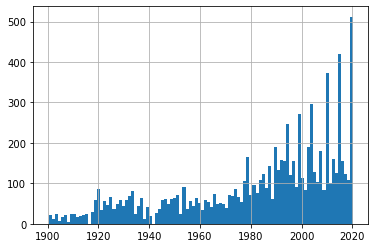

In [561]:
parlgov_election["election_date"] = pd.to_datetime(parlgov_election["election_date"])
parlgov_election["election_date"].hist(bins=100)
## Maybe it's a feature of particular years?

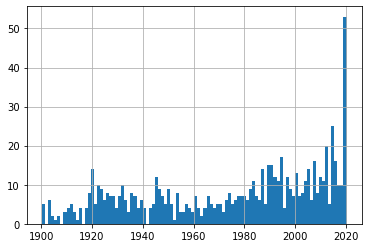

In [563]:
parlgov_election[parlgov_election["party_id"].apply(lambda x: x in missing_parlgov_party_ids)]\
    ["election_date"].hist(bins=100)

## Nope!

# Appears to be a side effect of them including Independents

In [585]:
# parlgov_party

In [571]:
parlgov_party[parlgov_party["party_id"].apply(lambda x: x in missing_parlgov_party_ids)]["party_name_english"].value_counts().head(50)

no party affiliation                                 37
no seat                                              26
one seat                                             20
others                                               17
to be coded                                          15
Centre Party                                          2
Leftwing Union for the Socialist Democracy            1
TOGETHER -- Civic Democracy                           1
Communist  Party of Finland (Unity)                   1
Political Club "Ecoglasnost"                          1
Community of the People                               1
Social Democratic Party                               1
The Greens                                            1
Coexistence                                           1
Greenland and Faroe Islands                           1
Prime minister                                        1
Ratana Movement                                       1
Independent Alliance                            

In [573]:
parlgov_party.columns

Index(['country_name_short', 'country_name', 'party_name_short',
       'party_name_english', 'party_name', 'party_name_ascii',
       'family_name_short', 'family_name', 'left_right', 'state_market',
       'liberty_authority', 'eu_anti_pro', 'cmp', 'euprofiler', 'ees',
       'castles_mair', 'huber_inglehart', 'ray', 'benoit_laver', 'chess',
       'country_id', 'party_id', 'family_id'],
      dtype='object')

In [574]:
parlgov_election.columns

Index(['country_name_short', 'country_name', 'election_type', 'election_date',
       'vote_share', 'seats', 'seats_total', 'party_name_short', 'party_name',
       'party_name_english', 'left_right', 'country_id', 'election_id',
       'previous_parliament_election_id', 'previous_cabinet_id', 'party_id'],
      dtype='object')

In [577]:
parlgov_cabinet.columns

Index(['country_name_short', 'country_name', 'election_date', 'start_date',
       'cabinet_name', 'caretaker', 'cabinet_party', 'prime_minister', 'seats',
       'election_seats_total', 'party_name_short', 'party_name',
       'party_name_english', 'left_right', 'country_id', 'election_id',
       'cabinet_id', 'previous_cabinet_id', 'party_id'],
      dtype='object')

In [576]:
parlgov_variable.head(50)

,table_name,type,name,description,comment
0,view_variable,text,table_name,name of table in ParlGov database,NaN
1,view_variable,text,type,"type of data (text, integer, real, binary, date)",NaN
2,view_variable,text,name,name of variable in ParlGov database,NaN
3,view_variable,text,description,Information about this observation.,This field should also include a short textual...
4,view_variable,text,comment,additional information about the coding of thi...,NaN
5,view_party,text,country_name_short,three letter abbreviation of country -- iso al...,NaN
6,view_party,text,country_name,name of country,NaN
7,view_party,text,party_name_short,party abbreviation,NaN
8,view_party,text,party_name_english,English name of party,NaN
9,view_party,text,party_name,original name of party with native characters,field may require a change of character encodi...


In [309]:
euromanifesto = pd.read_stata( dataset_folder+"CMP"+os.sep+"ZA5162_v1-0-0.dta" )


,za_nr,version,doi,country,region,country_year,emcs,emcs_year,ees,marpor,...,per_v3_7063b,per_v1_7063a,per_v2_7063a,per_v3_7063a,per_v1_7064b,per_v2_7064b,per_v3_7064b,per_v1_7064a,per_v2_7064a,per_v3_7064a
0,5162.0,1.0.0 (2016-07-28),doi:10.4232/1.5162,Europe,Europe,10_14,10100 GREEN-EFA,10100_14,No EES code available,Unavailable,...,0,0.000000,0.797267,0.113895,0.0,0.0,0,0.0,0.0,0.113895
1,5162.0,1.0.0 (2016-07-28),doi:10.4232/1.5162,Europe,Europe,10_14,10300 PES,10300_14,No EES code available,Unavailable,...,0,0.000000,2.764977,0.000000,0.0,0.0,0,0.0,0.0,0.000000
2,5162.0,1.0.0 (2016-07-28),doi:10.4232/1.5162,Europe,Europe,10_14,10400 ALDE,10400_14,No EES code available,Unavailable,...,0,0.000000,0.911854,0.000000,0.0,0.0,0,0.0,0.0,0.000000
3,5162.0,1.0.0 (2016-07-28),doi:10.4232/1.5162,Europe,Europe,10_14,10600 EPP,10600_14,No EES code available,Unavailable,...,0,0.000000,0.523560,0.000000,0.0,0.0,0,0.0,0.0,0.000000
4,5162.0,1.0.0 (2016-07-28),doi:10.4232/1.5162,Europe,Europe,10_14,10610 ECR,10610_14,No EES code available,Unavailable,...,0,0.000000,0.226501,0.000000,0.0,0.0,0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,5162.0,1.0.0 (2016-07-28),doi:10.4232/1.5162,Slovenia,Slovenia,97_14,97321 SD,97321_14,1705323 SD,97321,...,0,0.653595,0.653595,1.307190,0.0,0.0,0,0.0,0.0,0.000000
195,5162.0,1.0.0 (2016-07-28),doi:10.4232/1.5162,Slovenia,Slovenia,97_14,97411 Verjamem,97411_14,1705100 Verjamem,Unknown,...,0,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.000000
196,5162.0,1.0.0 (2016-07-28),doi:10.4232/1.5162,Slovenia,Slovenia,97_14,97431 Zares,97431_14,1705324 Zares,97440,...,0,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.000000
197,5162.0,1.0.0 (2016-07-28),doi:10.4232/1.5162,Slovenia,Slovenia,97_14,97510 NSi-SLS,97510_14,1705001 NSi-SLS,Unknown,...,0,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.000000


In [313]:
euromanifesto.columns[0:50]

Index(['za_nr', 'version', 'doi', 'country', 'region', 'country_year', 'emcs',
       'emcs_year', 'ees', 'marpor', 'cphl', 'eep', 'member', 'year',
       'initials', 'partyname', 'partyinfo', 'pfamily', 'mfamily', 'ofamily',
       'EPvote', 'EPseats', 'EPseatsum', 'group', 'manif', 'NATvote',
       'NATseats', 'gov', 'pm', 'left', 'environ', 'liberta', 'religious',
       'state', 'multicult', 'integration', 'pubservice', 'redistribut',
       'liberties', 'lifestyle', 'immigration', 'rile_mrg', 'planeco',
       'markeco', 'welfare', 'pro_anti_EU', 'persid', 'total', 'per_v_099',
       'per_v1_101b'],
      dtype='object')

In [318]:
euromanifesto[['country', 'region', 'country_year', 'emcs',
       'emcs_year', 'ees', 'marpor', 'cphl', 'eep', 'member', 'year',
       'initials', 'partyname', 'partyinfo', 'persid', 'total']]

,country,region,country_year,emcs,emcs_year,ees,marpor,cphl,eep,member,year,initials,partyname,partyinfo,persid,total
0,Europe,Europe,10_14,10100 GREEN-EFA,10100_14,No EES code available,Unavailable,Unavailable,Inapplicable,Inapplicable,2014.0,GREEN-EFA,Group of the Greens - European Free Alliance,,201473,878.0
1,Europe,Europe,10_14,10300 PES,10300_14,No EES code available,Unavailable,Unavailable,Inapplicable,Inapplicable,2014.0,PES,Party of European Socialists,,201473,217.0
2,Europe,Europe,10_14,10400 ALDE,10400_14,No EES code available,Unavailable,Unavailable,Inapplicable,Inapplicable,2014.0,ALDE,Group of the Alliance of Liberals and Democrat...,,201473,329.0
3,Europe,Europe,10_14,10600 EPP,10600_14,No EES code available,Unavailable,Unavailable,Inapplicable,Inapplicable,2014.0,EPP,European People's Party,1953-1979: CD (Christian Democrats); 1979-1999...,201473,191.0
4,Europe,Europe,10_14,10610 ECR,10610_14,No EES code available,Unavailable,Unavailable,Inapplicable,Inapplicable,2014.0,ECR,European Conservatives and Reformist Group,,201473,883.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Slovenia,Slovenia,97_14,97321 SD,97321_14,1705323 SD,97321,2903,2004,2004,2014.0,SD,Socialni Demokrati,1993-2005: ZLSD (Združena Lista Socialnih Demo...,201465,153.0
195,Slovenia,Slovenia,97_14,97411 Verjamem,97411_14,1705100 Verjamem,Unknown,Unknown,2004,2004,2014.0,Verjamem,Verjamem,,201465,39.0
196,Slovenia,Slovenia,97_14,97431 Zares,97431_14,1705324 Zares,97440,2910,2004,2004,2014.0,Zares,Zares,,201465,86.0
197,Slovenia,Slovenia,97_14,97510 NSi-SLS,97510_14,1705001 NSi-SLS,Unknown,Unknown,2004,2004,2014.0,NSi-SLS,Nova Slovenija - Slovenska Ljudska Stranka,,201465,94.0


In [319]:
euromanifesto["emcs"].value_counts()

97951 DeSUS        1
33410 C's          1
33210 Podemos      1
33120 PE           1
33110 IP           1
                  ..
53220 SP           1
53110 GP           1
51953 SF           1
51951 UKIP         1
10100 GREEN-EFA    1
Name: emcs, Length: 199, dtype: int64

In [330]:
pf_ees14_ids.astype(int).max()

# 1040110-1826951

1826951

In [331]:
euromanifesto["ees"].value_counts()

No EES code available    25
1191002 RC                2
1233613 IRL               1
1246110 VIHR              1
1276521 CDU               1
                         ..
1528528 CU-SGP            1
1528521 CDA               1
1528420 VVD               1
1528330 D66               1
1372951 SF                1
Name: ees, Length: 174, dtype: int64

In [341]:
euromanifesto["ees_id"] = euromanifesto["ees"].replace({"No EES code available":np.nan}).apply(lambda x: x.split(" ")[0] if pd.notnull(x) else np.nan)
euromanifesto["ees_party"] = euromanifesto["ees"].replace({"No EES code available":np.nan}).apply(lambda x: " ".join(x.split(" ")[1:])  if pd.notnull(x) else np.nan)
euromanifesto["emcs_id"] = euromanifesto["emcs"].replace({"No EES code available":np.nan}).apply(lambda x: x.split(" ")[0] if pd.notnull(x) else np.nan)
euromanifesto["emcs_party"] = euromanifesto["emcs"].replace({"No EES code available":np.nan}).apply(lambda x: " ".join(x.split(" ")[1:]) if pd.notnull(x) else np.nan)

euromanifesto["ees_id"].apply(lambda x: x not in pf_ees14_ids.values).sum(),euromanifesto["ees_id"].isnull().sum()

In [955]:
missing_ees14_party_ids = euromanifesto[euromanifesto["ees_id"].apply(lambda x: str(x) not in pf_ees14_ids.values)]["ees_id"].sort_values().unique()

em_cols = ['ees_id', 'region', 'country_year', 'emcs',  'ees', 'marpor', 'cphl', 'eep', 'member', 'year',
       'initials', 'partyname', 'partyinfo', 'pfamily', 'mfamily', 'ofamily', 'ees_party', 'emcs_id',   'emcs_party']

list( euromanifesto[euromanifesto["ees_id"].apply(lambda x: x in missing_ees14_party_ids)]["country"].unique() )

In [970]:
cntry = "France"

euromanifesto[euromanifesto["ees_id"]\
    .apply(lambda x: (x in missing_ees14_party_ids) or pd.isnull(x)) & (euromanifesto["country"]==cntry)]\
    [em_cols]


,ees_id,region,country_year,emcs,ees,marpor,cphl,eep,member,year,initials,partyname,partyinfo,pfamily,mfamily,ofamily,ees_party,emcs_id,emcs_party
56,NaN,France,31_14,31115 EELV,No EES code available,31110,605,1979,1952,2014.0,EELV,Europe Écologie - Les Verts,,Green Parties,Ecologist,Green Parties,NaN,31115,EELV
57,1250226,France,31_14,31221 LO,1250226 LO,Unknown,Unknown,1979,1952,2014.0,LO,Lutte Ouvrière,Before 2004: LO (Lutte Ouvrière);2004-2014: EG...,(Post-)Communist Parties,Unknown,Unknown,LO,31221,LO
59,NaN,France,31_14,31324 PS-PRG,No EES code available,Unknown,Unknown,1979,1952,2014.0,PS-PRG,Parti Socialiste - Parti Radical de Gauche,,Social Democratic Parties,Communist,Social Democratic Parties,NaN,31324,PS-PRG
62,1250336,France,31_14,31950 MoDem-UDI,1250336 MoDem-UDI,31624,613,1979,1952,2014.0,MoDem-UDI,Mouvement Démocrate - Union des Démocrates et ...,,Christian Democratic Parties,Conservative,Conservative Parties,MoDem-UDI,31950,MoDem-UDI


In [2]:
cntry = "pol"
partyfacts_core_parties[(partyfacts_core_parties["country"]==cntry.upper())]\
    .sort_values(by="year_first",ascending=False)[:50]

# ees_id where not NaN, emcs elsewhere
# {
# 1705100:3205, 1705001:[1618,764], # svn
    # really is a straight up joint 2 party list
# 1642400:5246, 1642401:481, 1642301:6153, 1642503:3210, # rou
# 1440021:237 , 1440824:1490, "88910 LRA-RA":556, # ltu
# "87411 V":852,"87710 VL-TB/LNNK":7619,1428901:5657, # lva
# 1348120:[2458,3115] , 1348220:1408, 1348330:469, "86524 Fidesz-KDNP":6366 , # hun
# 1203531:[223,1707], # cze
# 1191110:3201, # hrv
# 1100601:3189, "80630 BBZ+VMRO-BND+ZNS+DG":np.nan, # bgr
# 1372220:1448, # irl
# 1826621:1366, # gbr
# "41112 ÖDP":7345, 1276522:1731, "41710 NPD":1723, "41910 FW":1090, "41952 Familie":????,"41953 Die Partei":6126,"41954 Tierschutz":749, # deu
# 1620110:3226, # prt
# 1300314:np.nan, 1300323:3118, 1300116:378, # grc
# "33110 IP":np.nan,1724925:np.nan,1724230:3203,"33410 C's":3217,"33960 LPD":np.nan,
# bleugh - 3 uber-coalitions
# https://es.wikipedia.org/wiki/Primavera_Europea_(2014)
# https://en.wikipedia.org/wiki/The_Peoples_Decide    
# https://en.wikipedia.org/wiki/Plural_Left_(Spain,_2011)
# "32210 L'Altra Europa":6685, 1380958:1369, # ita
# "31115 EELV":5650, 1250226:, "31324 PS-PRG":[1478,1783], 1250336:[496,3229], # fra
# 1528528:6758, # nld
# 1056112:528, "21520 CSP":6688, # bel
# 1208954: 333, # dnk
# 1752321:487, 1752952:1093 ,



# }

NameError: name 'partyfacts_core_parties' is not defined

In [ ]:
wikipedia     3885
clea          2257
dpi           1678
polcon        1655
parlgov       1366
manifesto     1170
chisols       1125
# mackie         734
cses           690
# gloelec        657
# ejpr           655
# afrelec        578
wvs            571
pip            568
ess            546
ches           530
...
ees14          199

In [ ]:
# party-datasets
# parlgov, manifesto, ees14, ches,
# pip definitely looks interesting, check out the stata file
# pip -> per party, per quarter -> with values being interpolated/delta interpolated/marked as original

# party-voter datasets
# ess, wvs, cses


# chisols, clea, dpi, polcon, wikipedia
# does wikipedia have any new/interesting semi-consistent information??? Like what? membership size?
# 

# polcon is interesting - it's a country x year event breakdown with columns for top X parties estimating metrics of policy constraint
# dpi - similar government focused measure, with side data relating to parties
# clea - election results, with some fine-grained geographical data, 2008-2019
# http://www.electiondataarchive.org/data-and-documentation.php

# chisols
# change of leadership within states from period 1919-2008
# lists head of executive *and affiliated party*




In [539]:
## PIP dataset

pip = pd.read_stata( dataset_folder+"PIP"+os.sep+"pip_ts_Stata15.dta" )

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\pandas\io\stata.py:1409: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [542]:
pip.dtypes.value_counts()

float64           354
float32           169
object             12
datetime64[ns]     11
category            2
category            2
int16               2
int32               1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
int8                1
category            1
category            1
category            1
category            1
dtype: int64

In [543]:
pip.select_dtypes('object')

,id,p102,p123,p503,p617,p624,cmp02_countryname,cmp09_partyname,cmp25_partyabbrev,cmp27_corpusversion,cmp28_datasetversion,cmp29_id_perm
0,36.-64.63001,,,,,,,,,,,
1,36.-64.63002,,,,,,,,,,,
2,36.-64.63110,,,,,,,,,,,
3,36.-64.63320,,,,,,,,,,,
4,36.-64.63321,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
182230,840.226.61620,,,,,,,,,,,
182231,840.226.61999,,,,,,,,,,,
182232,840.227.61320,DEM,Obama,Obama,,,United States,Democratic Party,Democrats,2017-2,2017b,1QU4XM
182233,840.227.61620,,,,,,United States,Republican Party,Republicans,2017-2,2017b,G275DU


In [545]:
pip["p102"].value_counts()

          164023
NONA        1699
SDP          534
LIB          489
FDP          475
           ...  
PSIU           2
ex-ODS         1
LIDEM          1
WAK            1
ZaAB           1
Name: p102, Length: 378, dtype: int64

In [546]:
pip["cmp09_partyname"].value_counts()

                                                         178282
Social Democratic Party                                      77
Labour Party                                                 70
Democratic Party                                             50
Liberal Party                                                49
                                                          ...  
Milan Bandić 365 - The Party of Labour and Solidarity         1
Lithuanian National Union                                     1
Jim Anderton’s Progressive                                    1
Joint List Bloc                                               1
Sajudis Coalition                                             1
Name: cmp09_partyname, Length: 679, dtype: int64

In [548]:
pip_file = "pip_ts_Stata15.dta"


reader = pd.io.stata.StataReader(dataset_folder+"PIP"+os.sep+pip_file)

header = reader.variable_labels()
labels = reader.value_labels()

 
with open(dataset_folder+"PIP"+os.sep+pip_file.replace("dta","_labels.zip"), 'wb') as fname:
    pickle.dump(labels, fname)
with open(dataset_folder+"PIP"+os.sep+pip_file.replace("dta","_header.zip"), 'wb') as fname:
    pickle.dump(header, fname)

In [549]:
header

{'id': 'Unique ID for each observation (ISO.Quarter.Party)',
 'g101': 'Numeric country code (ISO)',
 'g102': 'Country name',
 'g103': 'Year',
 'g104': 'Quarter',
 'g105': 'Consecutive number of the quarters',
 'g106': 'Identification of modified entries',
 'g107': 'Origin of CMP data',
 'g108': 'Origin of government data',
 'p101': 'Party code according to CMP',
 'p102': 'Name of the government party',
 'p103': 'Dummy: 1 = Government party',
 'p104': 'Date of investiture of the cabinet',
 'p105': 'End date of the cabinet',
 'p106': 'Consecutive number of the cabinet',
 'p107': 'Number of ministers (i.e. persons)',
 'p108': 'Sum of ministers in the cabinet',
 'p109': 'p% of ministers',
 'p110': 'Number of portfolios (i.e. categorization of ministries)',
 'p111': 'Sum of portfolios in the cabinet',
 'p112': 'p% of portfolios',
 'p113': 'Dummy: 0 = Non-aligned minister (else = 1)',
 'p114': 'Sum of ministers WITHOUT non-aligned ministers',
 'p115': 'p% of ministers (WITHOUT non-aligned mi

In [ ]:
## bunch of government composition variables

## bunch of positioning variables from (pre-?)cmp datasets
# Jahn|Jahn/Oberst|Franzmann/Kaiser|Budge et al.|Ad hoc-Index: Pro/Anti EU (Warntjen, Hix, Crombez 2008)|Ad hoc-Index: GG light (Knill)

# figure out whether it's easier to extract from here or from original sources


## bunch of positioning variables straight from cmp



In [591]:
index_vars = [x for x in header.keys() if re.match("(ja|jo|fk|bu|ah)\d+o", x)]

In [607]:
pip[index_vars].dropna(axis=0,how='all').isnull().sum()

ja10o       0
ja11o       0
ja12o       0
ja13o       0
ja14o       0
ja15o       0
ja16o       0
ja17o       0
ja18o       0
ja20o       0
ja21o       0
ja22o       0
ja23o       0
ja24o      17
ja25o       0
ja26o       0
ja27o       0
ja28o       0
jo01o       6
jo02o      12
fk01o    1530
fk02o    1541
fk03o    1522
bu01o       0
bu02o       0
bu03o       0
bu04o       0
bu05o       0
ah01o       0
ah02o       0
dtype: int64

In [597]:
pip

,id,g101,g102,g103,g104,g105,g106,g107,g108,p101,...,per7051o,per7052c,per7052f,per7052o,per7061c,per7061f,per7061o,per7062c,per7062f,per7062o
0,36.-64.63001,36,Australia,1944.0,1944-01-01,-64,9,NaN,NaN,63001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36.-64.63002,36,Australia,1944.0,1944-01-01,-64,9,NaN,NaN,63002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.-64.63110,36,Australia,1944.0,1944-01-01,-64,9,NaN,NaN,63110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36.-64.63320,36,Australia,1944.0,1944-01-01,-64,9,NaN,NaN,63320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36.-64.63321,36,Australia,1944.0,1944-01-01,-64,9,NaN,NaN,63321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182230,840.226.61620,840,USA,2016.0,2016-07-01,226,0,NaN,NaN,61620,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN
182231,840.226.61999,840,USA,2016.0,2016-07-01,226,0,NaN,NaN,61999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182232,840.227.61320,840,USA,2016.0,2016-10-01,227,2,Update 2013a,Country Source,61320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182233,840.227.61620,840,USA,2016.0,2016-10-01,227,2,Update 2013a,NaN,61620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [613]:
# {x:header[x] for x in header.keys() if "party" in header[x].lower()}
temp = ['id','g101','g102','g103','g104','g105',]
temp = temp + ['p101','p102','p103','p118','cmp08_party','cmp09_partyname','cmp10_parfam','cmp25_partyabbrev',]
temp = {k:header[k] for k in temp}

In [614]:
temp

{'id': 'Unique ID for each observation (ISO.Quarter.Party)',
 'g101': 'Numeric country code (ISO)',
 'g102': 'Country name',
 'g103': 'Year',
 'g104': 'Quarter',
 'g105': 'Consecutive number of the quarters',
 'p101': 'Party code according to CMP',
 'p102': 'Name of the government party',
 'p103': 'Dummy: 1 = Government party',
 'p118': 'Existence of a party',
 'cmp08_party': 'CMP party code',
 'cmp09_partyname': 'Name of party (english)',
 'cmp10_parfam': 'party family membership',
 'cmp25_partyabbrev': 'party abbreviation'}

In [615]:
pip[index_vars].dropna(axis=0,how='all').isnull().sum()

ja10o       0
ja11o       0
ja12o       0
ja13o       0
ja14o       0
ja15o       0
ja16o       0
ja17o       0
ja18o       0
ja20o       0
ja21o       0
ja22o       0
ja23o       0
ja24o      17
ja25o       0
ja26o       0
ja27o       0
ja28o       0
jo01o       6
jo02o      12
fk01o    1530
fk02o    1541
fk03o    1522
bu01o       0
bu02o       0
bu03o       0
bu04o       0
bu05o       0
ah01o       0
ah02o       0
dtype: int64

In [619]:
df = pip[index_vars].dropna(axis=0,how='all')
df.shape,df.drop_duplicates().shape

((3953, 30), (3166, 30))

In [626]:
pip[list(temp.keys())+index_vars].loc[pip[index_vars].dropna(axis=0,how='all').index].drop_duplicates()

,id,g101,g102,g103,g104,g105,p101,p102,p103,p118,...,fk01o,fk02o,fk03o,bu01o,bu02o,bu03o,bu04o,bu05o,ah01o,ah02o
113,36.-54.63320,36,Australia,1946.0,1946-07-01,-54,63320,ALP,1.0,2.0,...,2.808325,1.431361,6.385160,-16.400,6.200,1.100,14.200,3.700,0.00,0.000
117,36.-54.63620,36,Australia,1946.0,1946-07-01,-54,63620,,NaN,2.0,...,6.978710,6.223745,8.091213,12.500,0.900,17.200,2.800,0.300,0.00,0.000
119,36.-54.63810,36,Australia,1946.0,1946-07-01,-54,63810,,NaN,2.0,...,8.690991,8.549707,8.086785,41.900,0.000,28.400,0.000,0.000,0.00,0.000
256,36.-41.63320,36,Australia,1949.0,1949-10-01,-41,63320,ALP,1.0,2.0,...,2.637264,1.296674,5.813823,-25.800,9.000,4.500,14.100,0.000,0.00,0.000
260,36.-41.63620,36,Australia,1949.0,1949-10-01,-41,63620,,NaN,2.0,...,7.201391,6.101533,8.395968,25.000,1.100,18.200,3.300,0.500,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182137,840.195.61620,840,USA,2008.0,2008-10-01,195,61620,REP,1.0,2.0,...,NaN,NaN,NaN,25.124,1.490,1.787,3.674,1.291,0.10,1.986
182184,840.211.61320,840,USA,2012.0,2012-10-01,211,61320,DEM,1.0,2.0,...,NaN,NaN,NaN,-6.442,4.685,1.464,11.274,3.294,0.00,4.393
182185,840.211.61620,840,USA,2012.0,2012-10-01,211,61620,,NaN,2.0,...,NaN,NaN,NaN,27.957,1.075,8.005,5.615,1.254,-0.06,1.015
182232,840.227.61320,840,USA,2016.0,2016-10-01,227,61320,DEM,1.0,2.0,...,NaN,NaN,NaN,-6.442,4.685,1.464,11.274,3.294,0.00,4.393


In [628]:
df = pip[list(temp.keys())+index_vars].loc[pip[index_vars].dropna(axis=0,how='all').index]
df.columns = [header[x] for x in df.columns]

,id,g101,g102,g103,g104,g105,p101,p102,p103,p118,...,fk01o,fk02o,fk03o,bu01o,bu02o,bu03o,bu04o,bu05o,ah01o,ah02o
113,36.-54.63320,36,Australia,1946.0,1946-07-01,-54,63320,ALP,1.0,2.0,...,2.808325,1.431361,6.385160,-16.400,6.200,1.100,14.200,3.700,0.00,0.000
117,36.-54.63620,36,Australia,1946.0,1946-07-01,-54,63620,,NaN,2.0,...,6.978710,6.223745,8.091213,12.500,0.900,17.200,2.800,0.300,0.00,0.000
119,36.-54.63810,36,Australia,1946.0,1946-07-01,-54,63810,,NaN,2.0,...,8.690991,8.549707,8.086785,41.900,0.000,28.400,0.000,0.000,0.00,0.000
256,36.-41.63320,36,Australia,1949.0,1949-10-01,-41,63320,ALP,1.0,2.0,...,2.637264,1.296674,5.813823,-25.800,9.000,4.500,14.100,0.000,0.00,0.000
260,36.-41.63620,36,Australia,1949.0,1949-10-01,-41,63620,,NaN,2.0,...,7.201391,6.101533,8.395968,25.000,1.100,18.200,3.300,0.500,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182137,840.195.61620,840,USA,2008.0,2008-10-01,195,61620,REP,1.0,2.0,...,NaN,NaN,NaN,25.124,1.490,1.787,3.674,1.291,0.10,1.986
182184,840.211.61320,840,USA,2012.0,2012-10-01,211,61320,DEM,1.0,2.0,...,NaN,NaN,NaN,-6.442,4.685,1.464,11.274,3.294,0.00,4.393
182185,840.211.61620,840,USA,2012.0,2012-10-01,211,61620,,NaN,2.0,...,NaN,NaN,NaN,27.957,1.075,8.005,5.615,1.254,-0.06,1.015
182232,840.227.61320,840,USA,2016.0,2016-10-01,227,61320,DEM,1.0,2.0,...,NaN,NaN,NaN,-6.442,4.685,1.464,11.274,3.294,0.00,4.393


In [633]:
df.isnull().sum()

Unique ID for each observation (ISO.Quarter.Party)            0
Numeric country code (ISO)                                    0
Country name                                                  0
Year                                                         13
Quarter                                                       0
Consecutive number of the quarters                            0
Party code according to CMP                                   0
Name of the government party                                  0
Dummy: 1 = Government party                                2791
Existence of a party                                          2
CMP party code                                                0
Name of party (english)                                       0
party family membership                                       0
party abbreviation                                            0
Index Jahn: LR                                                0
Index Jahn: LR Importance               

In [669]:
df

,Unique ID for each observation (ISO.Quarter.Party),Numeric country code (ISO),Country name,Year,Quarter,Consecutive number of the quarters,Party code according to CMP,Name of the government party,Dummy: 1 = Government party,Existence of a party,...,Index Franzmann/Kaiser: Left-Right,Index Franzmann/Kaiser: Economic Dimension,Index Franzmann/Kaiser: Non-Economic Dimension,Index Budge et al.: RILE,Index Budge et al.: Planned Economy,Index Budge et al.: Market Economy,Index Budge et al.: Welfare,Index Budge et al.: International Peace,"Ad hoc-Index: Pro/Anti EU (Warntjen, Hix, Crombez 2008)",Ad hoc-Index: GG light (Knill)
113,36.-54.63320,36,Australia,1946.0,1946-07-01,-54,63320,ALP,1.0,2.0,...,2.808325,1.431361,6.385160,-16.400,6.200,1.100,14.200,3.700,0.00,0.000
117,36.-54.63620,36,Australia,1946.0,1946-07-01,-54,63620,,NaN,2.0,...,6.978710,6.223745,8.091213,12.500,0.900,17.200,2.800,0.300,0.00,0.000
119,36.-54.63810,36,Australia,1946.0,1946-07-01,-54,63810,,NaN,2.0,...,8.690991,8.549707,8.086785,41.900,0.000,28.400,0.000,0.000,0.00,0.000
256,36.-41.63320,36,Australia,1949.0,1949-10-01,-41,63320,ALP,1.0,2.0,...,2.637264,1.296674,5.813823,-25.800,9.000,4.500,14.100,0.000,0.00,0.000
260,36.-41.63620,36,Australia,1949.0,1949-10-01,-41,63620,,NaN,2.0,...,7.201391,6.101533,8.395968,25.000,1.100,18.200,3.300,0.500,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182137,840.195.61620,840,USA,2008.0,2008-10-01,195,61620,REP,1.0,2.0,...,NaN,NaN,NaN,25.124,1.490,1.787,3.674,1.291,0.10,1.986
182184,840.211.61320,840,USA,2012.0,2012-10-01,211,61320,DEM,1.0,2.0,...,NaN,NaN,NaN,-6.442,4.685,1.464,11.274,3.294,0.00,4.393
182185,840.211.61620,840,USA,2012.0,2012-10-01,211,61620,,NaN,2.0,...,NaN,NaN,NaN,27.957,1.075,8.005,5.615,1.254,-0.06,1.015
182232,840.227.61320,840,USA,2016.0,2016-10-01,227,61320,DEM,1.0,2.0,...,NaN,NaN,NaN,-6.442,4.685,1.464,11.274,3.294,0.00,4.393


In [674]:
pf_pip_link = partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="pip"].set_index("dataset_party_id")["partyfacts_id"]

In [678]:
pf_pip_link

dataset_party_id
63321     990
63110    1209
63320     424
63330    1540
63710    1997
         ... 
51621    1366
51951     601
51210     963
61320     432
61620     809
Name: partyfacts_id, Length: 568, dtype: int64

In [682]:
df["partyfacts_id"] = pf_pip_link.loc[ df["Party code according to CMP"].astype(str) ].values

In [684]:
df.to_pickle( dataset_folder + "PIP" + os.sep + "ideological_indices.zip", compression='zip' )

In [987]:
df = pd.read_pickle( dataset_folder + "PIP" + os.sep + "ideological_indices.zip", compression='zip' )

In [988]:
df["Party code according to CMP"].apply(lambda x: str(x) not in pf_pip_ids.values).sum()

0

In [655]:
df["Party code according to CMP"].apply(lambda x: str(x) not in list(manifesto_project["party"].values)).sum()

3953

In [657]:
df[df["Party code according to CMP"].apply(lambda x: x not in list(manifesto_project["party"].values))]

,Unique ID for each observation (ISO.Quarter.Party),Numeric country code (ISO),Country name,Year,Quarter,Consecutive number of the quarters,Party code according to CMP,Name of the government party,Dummy: 1 = Government party,Existence of a party,...,Index Franzmann/Kaiser: Left-Right,Index Franzmann/Kaiser: Economic Dimension,Index Franzmann/Kaiser: Non-Economic Dimension,Index Budge et al.: RILE,Index Budge et al.: Planned Economy,Index Budge et al.: Market Economy,Index Budge et al.: Welfare,Index Budge et al.: International Peace,"Ad hoc-Index: Pro/Anti EU (Warntjen, Hix, Crombez 2008)",Ad hoc-Index: GG light (Knill)
24831,191.121.81223,191,Croatia,1990.0,1990-04-01,121,81223,,NaN,2.0,...,NaN,NaN,NaN,-5.221,2.209,2.811,9.036,0.000,1.406,6.225
25002,191.130.81223,191,Croatia,1992.0,1992-07-01,130,81223,,NaN,2.0,...,NaN,NaN,NaN,-1.025,3.484,4.713,16.393,0.820,1.230,5.533
25249,191.143.81223,191,Croatia,1995.0,1995-10-01,143,81223,,NaN,2.0,...,NaN,NaN,NaN,3.008,2.256,2.256,19.549,0.000,4.511,0.752
25572,191.160.81223,191,Croatia,2000.0,2000-01-01,160,81223,SDP,1.0,2.0,...,NaN,NaN,NaN,-7.214,0.746,4.726,8.706,0.746,1.741,0.995
25857,191.175.81223,191,Croatia,2003.0,2003-10-01,175,81223,SDP,1.0,2.0,...,NaN,NaN,NaN,-14.545,0.000,0.606,18.788,0.606,1.818,1.818
26161,191.191.81223,191,Croatia,2007.0,2007-10-01,191,81223,,NaN,2.0,...,NaN,NaN,NaN,-9.272,0.000,0.662,16.777,0.221,3.091,0.442
26465,191.207.81223,191,Croatia,2011.0,2011-10-01,207,81223,,NaN,2.0,...,NaN,NaN,NaN,-14.728,0.221,1.399,12.592,0.000,6.112,2.283
26769,191.223.81223,191,Croatia,2015.0,2015-10-01,223,81223,SDP,1.0,2.0,...,NaN,NaN,NaN,-12.835,2.107,2.490,17.433,0.000,0.766,5.556
26826,191.226.81223,191,Croatia,2016.0,2016-07-01,226,81223,,NaN,2.0,...,NaN,NaN,NaN,-10.052,0.639,2.847,15.747,0.581,0.058,6.159
26845,191.227.81223,191,Croatia,2016.0,2016-10-01,227,81223,,NaN,2.0,...,NaN,NaN,NaN,-10.052,0.639,2.847,15.747,0.581,0.058,6.159


In [ ]:
{81223:81220,# they merged them in later versions!
 32001:32051,# tough one since the party only exist 2013-2017 - they become Popular Alternative which appears in Civic Populare list
 93003:93002, 93004:93031, # closest alliance - but not a one-for-one match
 97002:97460,
}

In [661]:
pip.loc[147582,"g107"]

'MPPII'

In [665]:
pf_pip_ids[pf_pip_ids=="93004"]

24007    93004
Name: dataset_party_id, dtype: object

In [668]:
partyfacts_external_parties[partyfacts_external_parties["partyfacts_id"]==1541]

,country,dataset_key,dataset_party_id,name_short,name,name_english,year_first,year_last,share,share_year,description,comment,created,modified,external_id,partyfacts_id,linked
2287,ROU,parlgov,2002,UNPR,Uniunea Naţională pentru Progresul României,National Union for the Progress of Romania,2012,2012,NaN,NaN,NaN,NaN,2012-12-30 23:38:33.366000+00:00,2018-11-11 22:24:17.119444+00:00,1269,1541,2012-12-30 23:48:48.914000+00:00
5553,ROU,wikipedia,1541,UNPR,Uniunea Națională pentru Progresul României,National Union for the Progress of Romania,2010,2019,NaN,NaN,NaN,NaN,2018-07-08 17:46:10.678687+00:00,2019-08-19 17:19:13.841985+00:00,24368,1541,2018-07-08 17:46:10.743093+00:00
6818,ROU,ches,2709,UNPR,Uniunea Naionalǎ pentru Progresul României,National Union for the Progress of Romania,2014,2014,2.1,2012.0,NaN,NaN,2015-12-13 17:48:42.327051+00:00,2020-07-16 20:20:10.926030+00:00,15831,1541,2015-12-13 17:56:44.207055+00:00
17541,ROU,ccs,1-17-4-2012,UNPR,UNPR,NaN,2012,2012,NaN,NaN,NaN,NaN,2019-05-05 17:02:03.557145+00:00,2020-07-16 20:20:36.634328+00:00,33206,1541,2019-05-05 17:02:03.580345+00:00
22905,ROU,mapp,642009,UNPR,Uniunea Nationala pentru Progresul Romaniei,National Union for the Progress of Romania,2010,2014,NaN,NaN,NaN,NaN,2019-04-28 15:59:18.020517+00:00,2019-04-28 15:59:18.020563+00:00,32789,1541,2019-04-28 15:59:18.067851+00:00
24007,ROU,pip,93004,UNPR,NaN,NaN,2010,2016,NaN,NaN,NaN,NaN,2019-07-17 21:52:24.807708+00:00,2020-02-23 17:46:20.946417+00:00,34527,1541,2019-07-17 21:52:24.849371+00:00


In [666]:
partyfacts_external_parties.loc[[24006, 24007]]

,country,dataset_key,dataset_party_id,name_short,name,name_english,year_first,year_last,share,share_year,description,comment,created,modified,external_id,partyfacts_id,linked
24006,ROU,pip,93003,PC,NaN,NaN,2001,2016,NaN,NaN,NaN,NaN,2019-07-17 21:52:14.235600+00:00,2020-02-23 17:45:59.144955+00:00,34356,6769,2019-07-17 21:52:14.261406+00:00
24007,ROU,pip,93004,UNPR,NaN,NaN,2010,2016,NaN,NaN,NaN,NaN,2019-07-17 21:52:24.807708+00:00,2020-02-23 17:46:20.946417+00:00,34527,1541,2019-07-17 21:52:24.849371+00:00


In [ ]:
partyfacts_id = [6769,1541]

In [ ]:
#### Get all the indices together and look for inconsistencies!

# partyFacts

# CHES

# Parlgov

# Comparative Manifesto Project

# Euromanifesto

# Pip





In [689]:
manifesto_project[['country', 'countryname', 'oecdmember', 'eumember', 'edate', 'date',
       'party', 'partyname', 'partyabbrev', 'parfam',]].drop_duplicates()["party"].value_counts()

63810     28
63620     28
63320     28
13320     27
13620     27
          ..
74325      1
113621     1
88630      1
74710      1
53250      1
Name: party, Length: 1154, dtype: int64

In [697]:
temp = manifesto_project[['country', 'countryname', 
       'party',  'parfam',]].drop_duplicates()
temp["party"].value_counts()
#  'edate', 'date',
# 'oecdmember', 'eumember',
# 'partyname', 'partyabbrev',
# temp[temp["party"]==63810]


# tempting to squish this down and concatenate partyname/partyabbrev

22527     1
35312     1
76430     1
71622     1
41620     1
         ..
171306    1
89710     1
87340     1
171309    1
22528     1
Name: party, Length: 1154, dtype: int64

In [700]:
CHES_comb.columns[0:30]

# party_id, party, family, 

Index(['eumember', 'country', 'expert', 'party_id', 'year', 'party', 'vote',
       'family', 'eu_position', 'future', 'eu_ep', 'eu_fiscal', 'eu_employ',
       'eu_cohesion', 'eu_environ', 'eu_asylum', 'eu_foreign', 'lrgen',
       'lrecon', 'galtan', 'source', 'govt', 'partyname1', 'partyname2',
       'vote1', 'eu_intmark', 'eu_agri', 'enlargw', 'enlarge',
       'eu_ep_dissent'],
      dtype='object')

In [704]:
[x for x in CHES_comb.columns if "country" in x]

['country',
 'country_name',
 'country_continent',
 'country_region',
 'country_sub_region']

In [758]:
link_CHES = CHES_comb[['party_id',

 'cmp_id',
 'country',]].drop_duplicates().dropna()

#  'party',
#  'partyname1',
#  'partyname2',
#  'party_name',
#  'trend_party',


link_CHES["partyfacts_id"] = \
partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="ches"]\
    .set_index("dataset_party_id")["partyfacts_id"].loc[link_CHES["party_id"].astype(str)].values

# all overlaps legitimate (coalition/successor-predecessor)

In [763]:
manifesto_project.columns[0:30]

Index(['country', 'countryname', 'oecdmember', 'eumember', 'edate', 'date',
       'party', 'partyname', 'partyabbrev', 'parfam', 'coderid', 'manual',
       'coderyear', 'testresult', 'testeditsim', 'pervote', 'voteest',
       'presvote', 'absseat', 'totseats', 'progtype', 'datasetorigin',
       'corpusversion', 'total', 'peruncod', 'per101', 'per102', 'per103',
       'per104', 'per105'],
      dtype='object')

In [794]:
link_parlgov = parlgov_party[['country_name_short', 'party_name_short',
       'party_name_english',
       'family_name_short', 'cmp', 'euprofiler', 'ees',
       'castles_mair', 'huber_inglehart', 'ray', 'benoit_laver', 'chess',
        'party_id',]]

# link_parlgov["partyfacts_id"] = 
checkout_ids = link_parlgov[link_parlgov["party_id"].apply(lambda x: str(x) not in pf_parlgov_ids.values)][['cmp', 'euprofiler', 'ees',
       'castles_mair', 'huber_inglehart', 'ray', 'benoit_laver', 'chess',]].any(axis=1)
checkout_ids = checkout_ids[checkout_ids].index


parlgov_party.loc[checkout_ids][["party_id"]+list(parlgov_party.columns)]


,party_id,country_name_short,country_name,party_name_short,party_name_english,party_name,party_name_ascii,family_name_short,family_name,left_right,...,euprofiler,ees,castles_mair,huber_inglehart,ray,benoit_laver,chess,country_id,party_id,family_id
112,656,BEL,Belgium,MCC,Citizens' Movement for Change,Mouvement des Citoyens pour le Changement,Mouvement des Citoyens pour le Changement,chr,Christian democracy,5.5714,...,NaN,NaN,NaN,NaN,NaN,NaN,113.0,64,656,3
129,1487,BEL,Belgium,Spirit,Spirit,Spirit,Spirit,lib,Liberal,6.0000,...,20.0,1056328.0,NaN,NaN,NaN,NaN,118.0,64,1487,6
155,542,BGR,Bulgaria,DP,Democratic Party,Demokraticheska Partiya,Demokraticheska Partiya,chr,Christian democracy,9.4444,...,NaN,NaN,NaN,709.0,NaN,NaN,NaN,10,542,3
174,1548,BGR,Bulgaria,PKE,"Political Club ""Ecoglasnost""","Politicheski Klub ""Ekoglasnost""","Politicheski Klub ""Ekoglasnost""",eco,Green/Ecologist,2.5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1548,19
187,963,BGR,Bulgaria,ZP,Green Party of Bulgaria,Zelena Partiya,Zelena Partija,eco,Green/Ecologist,5.5556,...,NaN,NaN,NaN,705.0,NaN,NaN,NaN,10,963,19
188,529,BGR,Bulgaria,ZS-AS,"Agrarian Union ""Aleksandar Stamboliyski""","Zemedelski Suyuz ""Aleksandar Stamboliyski""","Zemedelski Suyuz ""Aleksandar Stamboliyski""",agr,Agrarian,5.3000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,529,2
424,1367,ESP,Spain,CA,Aragonese Council,Chunta Aragonesista,Chunta Aragonesista,spec,Special issue,2.7500,...,NaN,NaN,NaN,NaN,NaN,NaN,520.0,27,1367,16
454,1224,ESP,Spain,PDP,Popular Democratic Party,Partido Demócrata Popular,Partido Democrata Popular,lib,Liberal,5.9944,...,NaN,NaN,1410.0,3605.0,NaN,NaN,NaN,27,1224,6
455,424,ESP,Spain,PL,Liberal Party,Partido Liberal,Partido Liberal,lib,Liberal,6.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,424,6
483,1257,EST,Estonia,EMK,Estonian Rural Centre Party,Eesti Maa-Keskerakond,Eesti Maa-Keskerakond,agr,Agrarian,5.5556,...,NaN,NaN,NaN,1207.0,NaN,NaN,NaN,75,1257,2


In [975]:
cntry = "est"
partyfacts_core_parties[(partyfacts_core_parties["country"]==cntry.upper())]\
    .sort_values(by="year_first",ascending=False)[:50]

# {656:791, 1487:7015, # bel
#  542:6749, 1548:7807, 963:659, 529:7809, # bgr
#  1367:1564, 1224:206, 424:366, # esp
#  1257:np.nan, # est
#  1105:1319 , 806:1223, # fin
#  2252:np.nan , # fra
#  1547:957 , # gbr
#  2163:np.nan, # grc
#  379:1029, 30:np.nan, # irl 
#  896:614, 760:1165, # ita
#  1074:np.nan, 1208:1430, # pol
#  622:35, 889:387, 1535:886, 565:1301, # prt
#  152:477, # rou
#  2247:2283 , # svk
#  721:1485, # swe
# }

,country,partyfacts_id,technical,name_short,name,name_english,name_other,year_first,year_last,share,share_year,new,wikipedia,description,comment,created,modified
1978,EST,7341,NaN,ELE,Elurikkuse Erakond,Richness of Life,NaN,2018,NaN,1.2,2019.0,NaN,https://en.wikipedia.org/wiki/Richness_of_Life,NaN,NaN,2019-07-30 12:34:13.290193+00:00,2019-07-30 12:34:13.290322+00:00
1936,EST,7340,NaN,E200,Erakond Eesti 200,Estonia 200,NaN,2018,NaN,4.4,2019.0,NaN,https://en.wikipedia.org/wiki/Estonia_200,NaN,NaN,2019-07-30 12:30:50.027989+00:00,2019-07-30 12:30:50.028048+00:00
1961,EST,3271,NaN,EV,Eesti Vabaerakond,Free Party,NaN,2014,NaN,8.7,2015.0,NaN,https://en.wikipedia.org/wiki/Free_Party_%28Es...,NaN,NaN,2015-06-15 14:51:43.777519+00:00,2018-07-07 20:03:24.504230+00:00
1934,EST,4094,NaN,EKRE,Eesti Konservatiivne Rahvaerakond,Conservative People’s Party,NaN,2012,NaN,8.1,NaN,NaN,https://en.wikipedia.org/wiki/Conservative_Peo...,NaN,NaN,2015-09-22 13:26:14.192143+00:00,2015-12-03 14:46:44.162886+00:00
1945,EST,1040,NaN,EER,Erakonna Eestimaa Rohelised,Estonian Greens,NaN,2006,NaN,7.1,2007.0,NaN,https://en.wikipedia.org/wiki/Estonian_Greens,NaN,NaN,2012-12-29 10:55:46.925000+00:00,2019-01-24 15:30:58.668934+00:00
1987,EST,685,NaN,IRL,Erakond Isamaa ja Res Publica Liit,Union of Pro Patria and Res Publica,NaN,2006,NaN,20.5,2011.0,False,https://en.wikipedia.org/wiki/Union_of_Pro_Pat...,NaN,NaN,2012-12-29 10:54:35.679000+00:00,2018-07-07 20:03:28.074900+00:00
1985,EST,491,NaN,UVE/RP,Ühendus vabariigi eest / Res Publica,Union for the Republic / Res Publica Party,NaN,2001,2006.0,24.6,2003.0,NaN,https://en.wikipedia.org/wiki/Res_Publica_Party,NaN,NaN,2012-12-29 10:53:57.593000+00:00,2018-09-13 10:50:29.177376+00:00
1951,EST,7034,NaN,EPE,Eesti Pensionäride Erakond,Estonian Pensioners Party,NaN,2001,2007.0,NaN,NaN,NaN,NaN,2003: The Estonian Centre Party list included ...,NaN,2019-05-11 00:16:54.349453+00:00,2019-09-09 23:17:07.672695+00:00
1974,EST,110,NaN,ERL,Eestimaa Rahvalliit,People's Union of Estonia,NaN,2000,2012.0,13.0,2003.0,NaN,https://en.wikipedia.org/wiki/People%27s_Union...,NaN,NaN,2012-12-29 10:52:46.526000+00:00,2020-06-21 15:47:40.689650+00:00
1944,EST,175,NaN,ETRE,Eesti Talurahva Erakond,Estonian Farmers’ Party,NaN,1995,1995.0,1.5,1995.0,NaN,NaN,NaN,NaN,2012-12-29 10:52:58.504000+00:00,2015-11-07 20:59:28.685164+00:00


In [775]:
partyfacts_external_parties[partyfacts_external_parties["dataset_key"]=="parlgov"]\
    .set_index("dataset_party_id")["partyfacts_id"].loc[link_parlgov["party_id"].astype(str)].values


# positioning already contains some of the fiddly datasets!
# left/right — Castles/Mair 1983 (left/right), Huber/Inglehart 1995 (left/right), Benoit/Laver 2006 – (left/right), CHES 2010 (lrgen 1999 and 2002 and 2006)
# state/market — Benoit/Laver 2006 (taxes/spending), CHES 2010 (lrecon 1999 and 2002 and 2006)
# liberty/authority — Benoit/Laver 2006 (social), CHES 2010 (galtan 1999 and 2002 and 2006)
# EU anti/pro — Ray 1999 (pos96), Benoit/Laver 2006 (euauthority or eulargerstronger or eujoining), CHES 2010 (position 1999 and 2002 and 2006)


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [778]:
link_parlgov["party_id"].isnull().sum()

0